# Data Modelling (Variant III)

---

The modelling for this variant follows the same process as the Base dataset.

In [1]:
%run ../functions.py

In [2]:
X_train_v3_scaled = pd.read_csv('../Data/var3/X_train_v3_scaled.csv')
y_train_v3 = pd.read_csv('../Data/var3/y_train_v3.csv')
X_val_v3_scaled = pd.read_csv('../Data/var3/X_val_v3_scaled.csv')
y_val_v3 = pd.read_csv('../Data/var3/y_val_v3.csv')
X_test_v3_scaled = pd.read_csv('../Data/var3/X_test_v3_scaled.csv')
y_test_v3 = pd.read_csv('../Data/var3/y_test_v3.csv')

---

### Baseline Model

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

v3_baseline_model = DummyClassifier(random_state=21)

v3_baseline_model.fit(X_train_v3_scaled, y_train_v3)

v3_baseline_results = cross_val_score(v3_baseline_model,
                                      X_train_v3_scaled,
                                      y_train_v3,
                                      scoring='recall',
                                      cv=10).mean()

print(f"Train recall: {v3_baseline_results}")

Train recall: 0.010265096106962301


---

### First Model Iteration

In [4]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

n_features = X_train_v3_scaled.shape[1]

In [5]:
def modelling_v1(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v1 = models.Sequential()

    model_v1.add(layers.Input(shape=(n_features, )))
    model_v1.add(layers.Dense(32, activation='relu'))
    model_v1.add(layers.Dense(16, activation='relu'))
    model_v1.add(layers.Dense(1, activation='sigmoid'))

    model_v1.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v1_history = model_v1.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v1,
             name,
             model_v1_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00008: early stopping
Results for Variant III Model V1 with threshold = 0.5.

 Train f1: 0.4856023030598474 
 Val f1: 0.45662923076845374 

 Train Recall: 0.34017664194107056 
 Val Recall: 0.30455636978149414 

 Train FPR: 0.0006800453411415219 
 Val FPR: 0.0003645182296168059


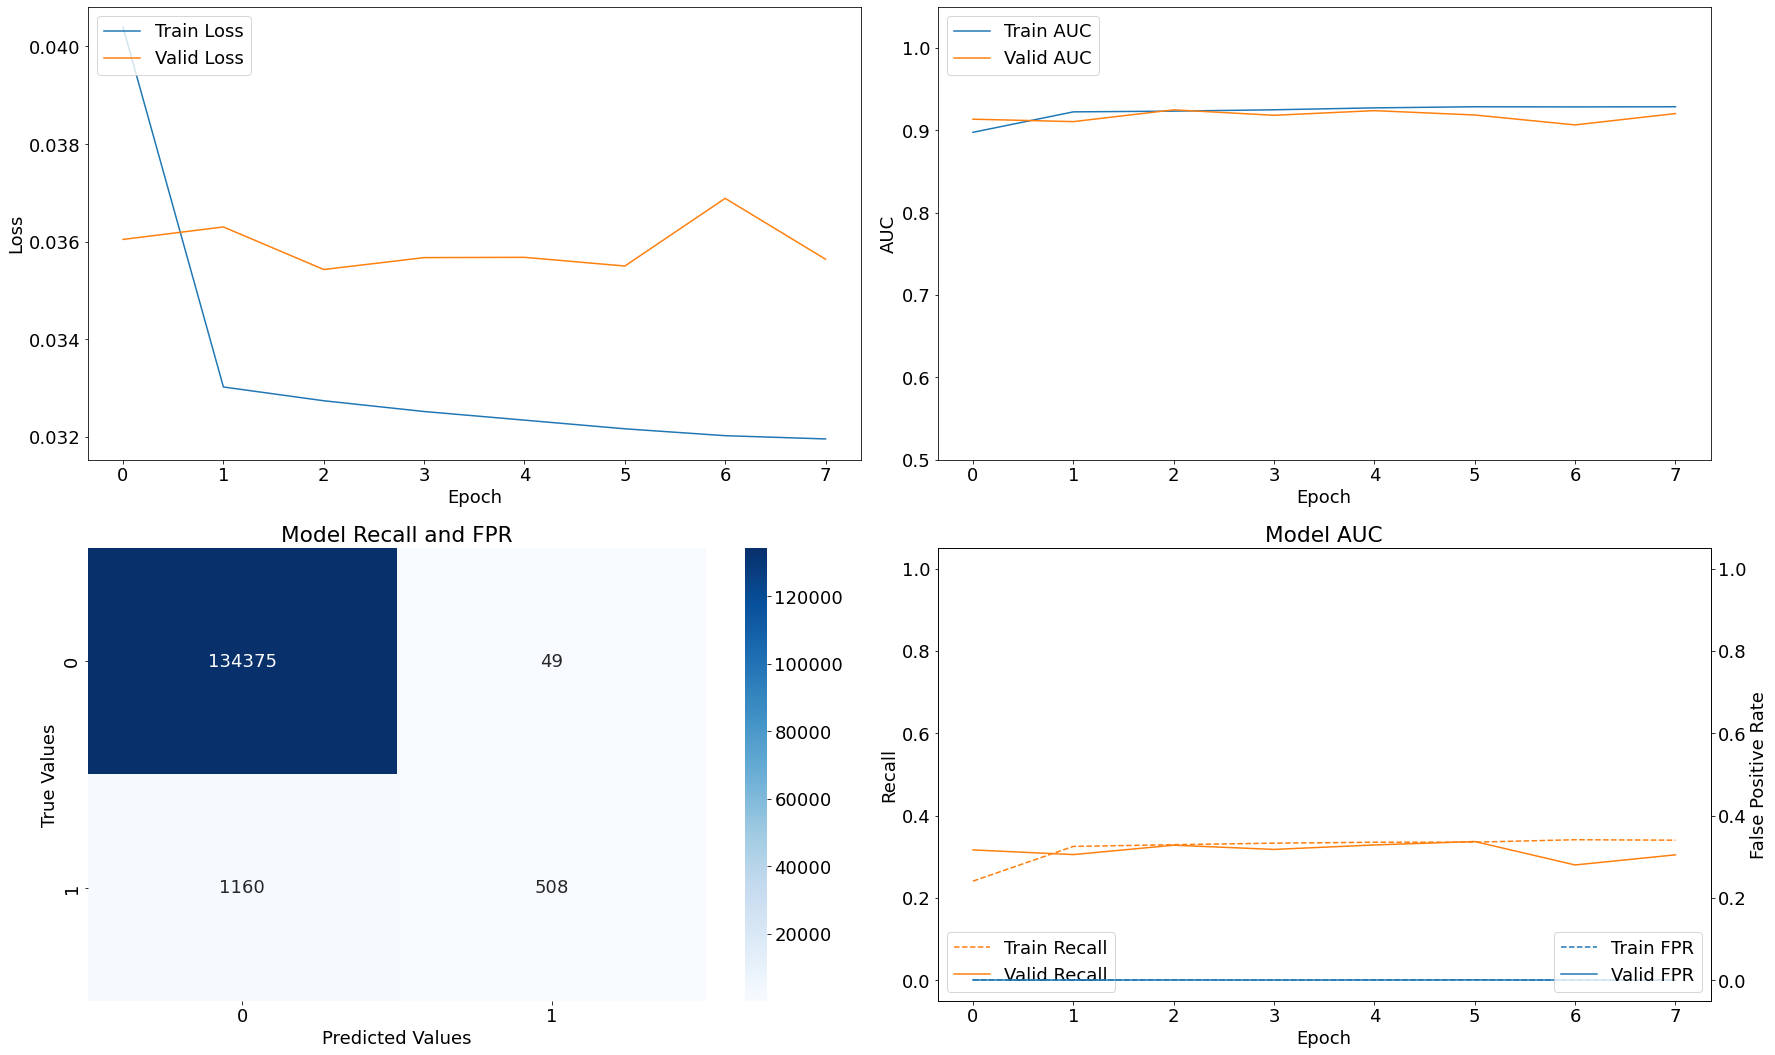

In [6]:
modelling_v1(X_train_v3_scaled,
             y_train_v3,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V1')

---

### Second Model Iteration

In [7]:
def modelling_v2(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v2 = models.Sequential()

    model_v2.add(layers.Input(shape=(n_features, )))
    model_v2.add(layers.Dense(32, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(16, activation='relu'))
    model_v2.add(layers.Dropout(0.5))
    model_v2.add(layers.Dense(1, activation='sigmoid'))

    model_v2.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['AUC',
                                   tf.keras.metrics.Precision(thresholds=threshold),
                                   tf.keras.metrics.Recall(thresholds=threshold),
                                   FalsePositiveRate(threshold=threshold)])

    model_v2_history = model_v2.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v2,
             name,
             model_v2_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00010: early stopping
Results for Variant III Model V2 with threshold = 0.5.

 Train f1: 0.38884827413191825 
 Val f1: 0.3929590765711091 

 Train Recall: 0.25387921929359436 
 Val Recall: 0.24760191142559052 

 Train FPR: 0.0005800386425107718 
 Val FPR: 0.00015622210048604757


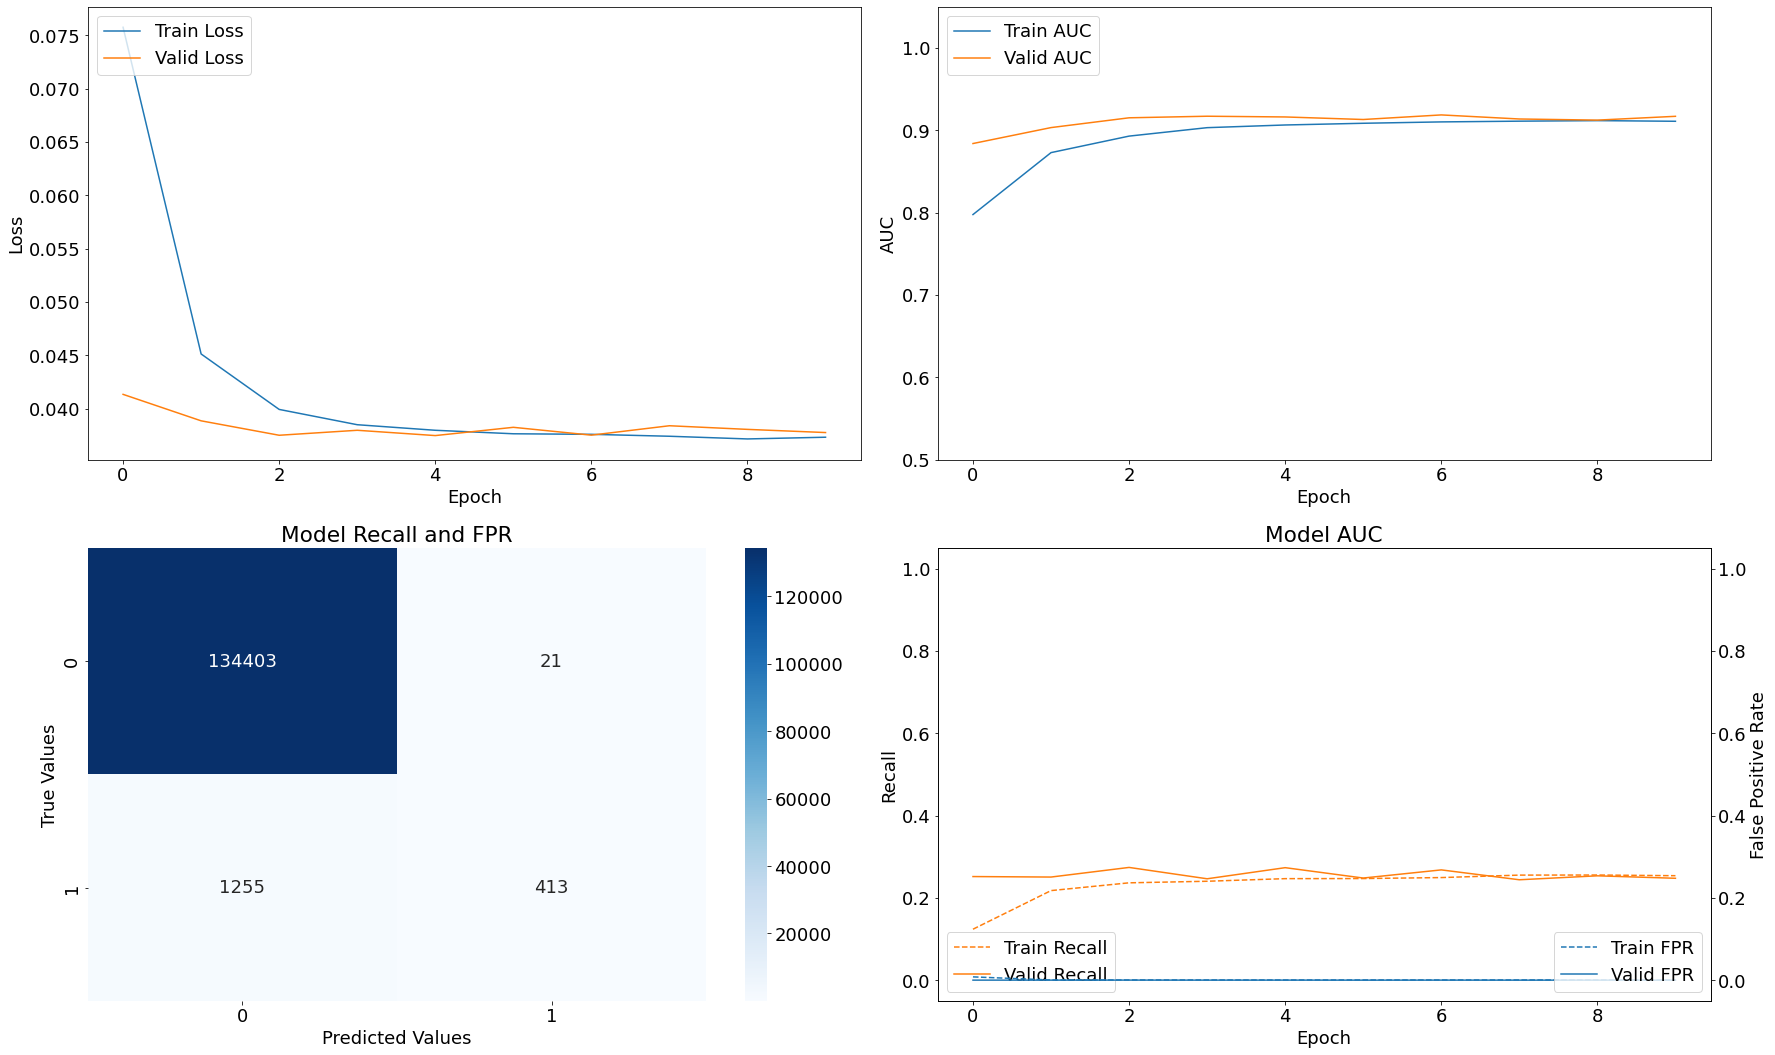

In [8]:
modelling_v2(X_train_v3_scaled,
             y_train_v3,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V2')

---

### Third Model Iteration

In [9]:
class_weight = create_class_weight({0: len(y_train_v3 == 0), 1: len(y_train_v3 == 1)})

In [10]:
def modelling_v3(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):
    
    model_v3 = models.Sequential()

    model_v3.add(layers.Input(shape=(n_features, )))
    model_v3.add(layers.Dense(32, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(16, activation='relu'))
    model_v3.add(layers.Dropout(0.5))
    model_v3.add(layers.Dense(1, activation='sigmoid'))

    model_v3.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v3_history = model_v3.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v3,
             name,
             model_v3_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00018: early stopping
Results for Variant III Model V3 with threshold = 0.5.

 Train f1: 0.385806454921392 
 Val f1: 0.4517583594870593 

 Train Recall: 0.24982096254825592 
 Val Recall: 0.30035972595214844 

 Train FPR: 0.000505367002915591 
 Val FPR: 0.0003645182296168059


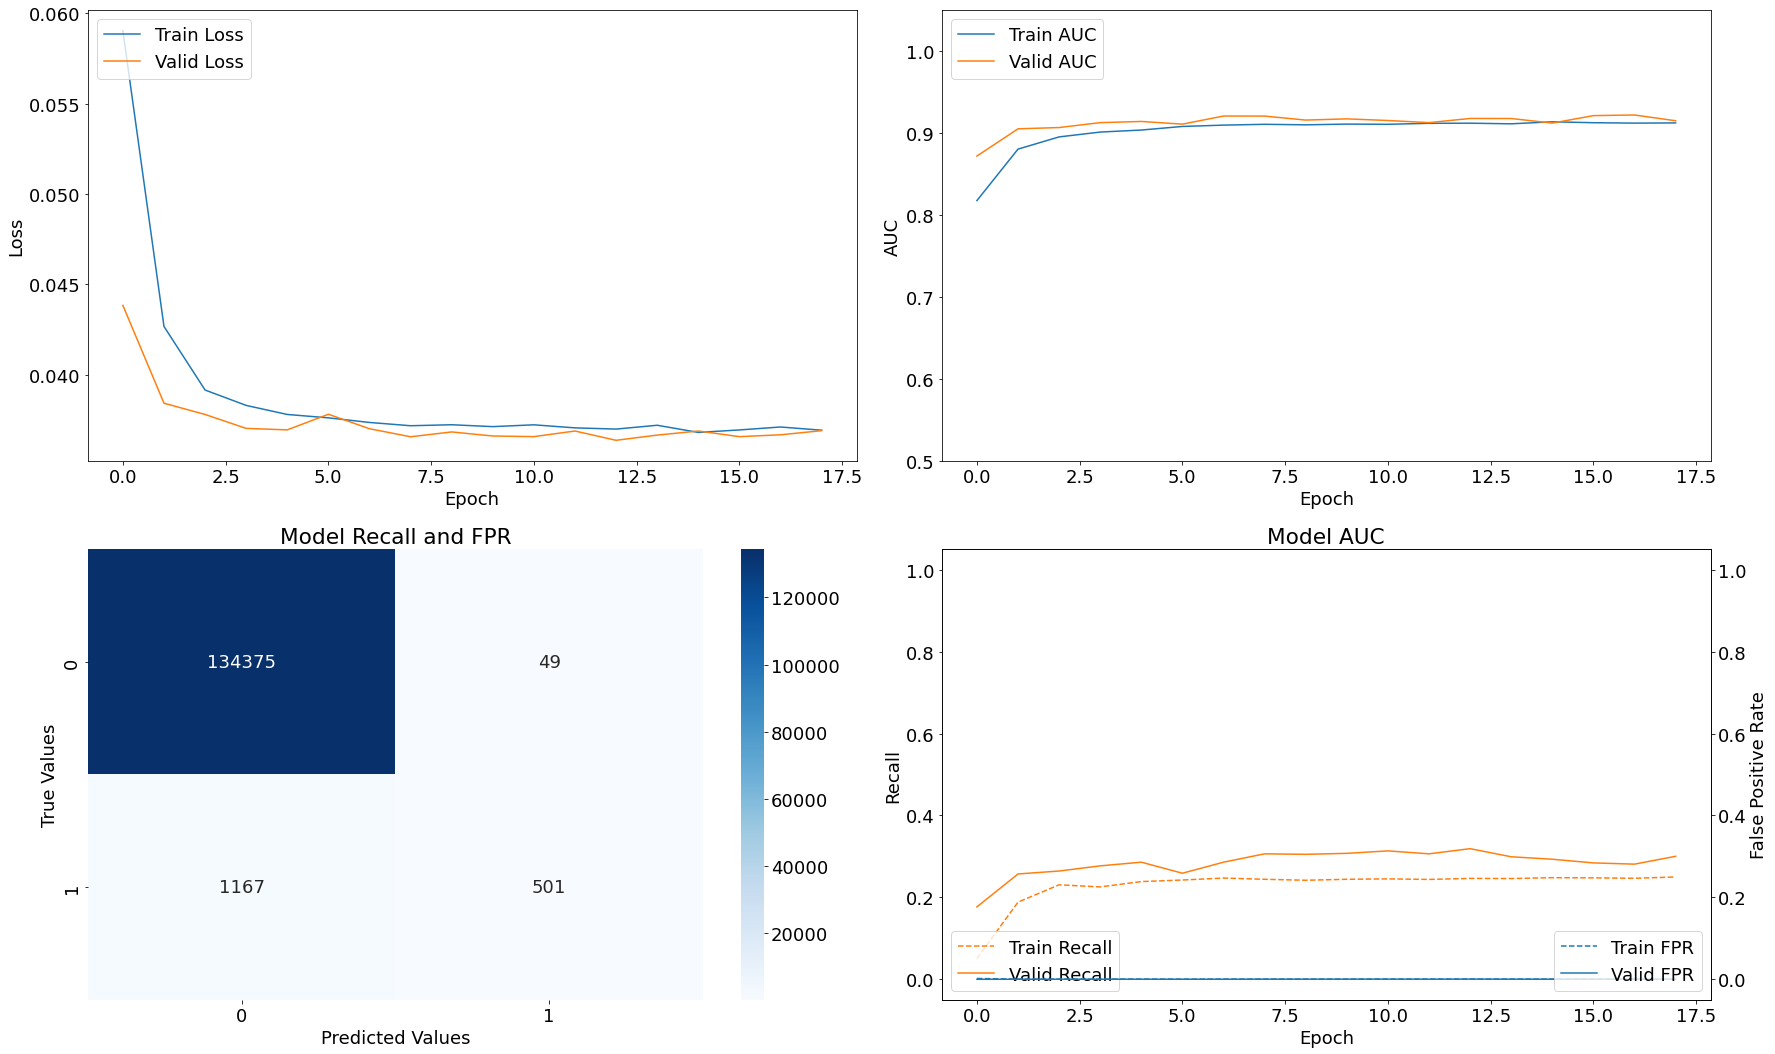

In [11]:
modelling_v3(X_train_v3_scaled,
             y_train_v3,
             X_val_v3_scaled,
             y_val_v3,
             'Variant III Model V3')

---

### Fourth Model Iteration

In [12]:
X_train_v3_scaled_resampled = pd.read_csv('../Data/var3/X_train_v3_scaled_resampled.csv')
y_train_v3_resampled = pd.read_csv('../Data/var3/y_train_v3_resampled.csv')

In [13]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

In [14]:
def modelling_v4(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):    
    
    model_v4 = models.Sequential()

    model_v4.add(layers.Input(shape=(n_features, )))
    model_v4.add(layers.Dense(32, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(16, activation='relu'))
    model_v4.add(layers.Dropout(0.5))
    model_v4.add(layers.Dense(1, activation='sigmoid'))

    model_v4.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v4_history = model_v4.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history

    evaluate(model_v4,
             'Base Model V4',
             model_v4_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00026: early stopping
Results for Base Model V4 with threshold = 0.5.

 Train f1: 0.7897802043188302 
 Val f1: 0.3191167556374244 

 Train Recall: 0.7435822486877441 
 Val Recall: 0.6324940323829651 

 Train FPR: 0.03485698997974396 
 Val FPR: 0.028930846601724625


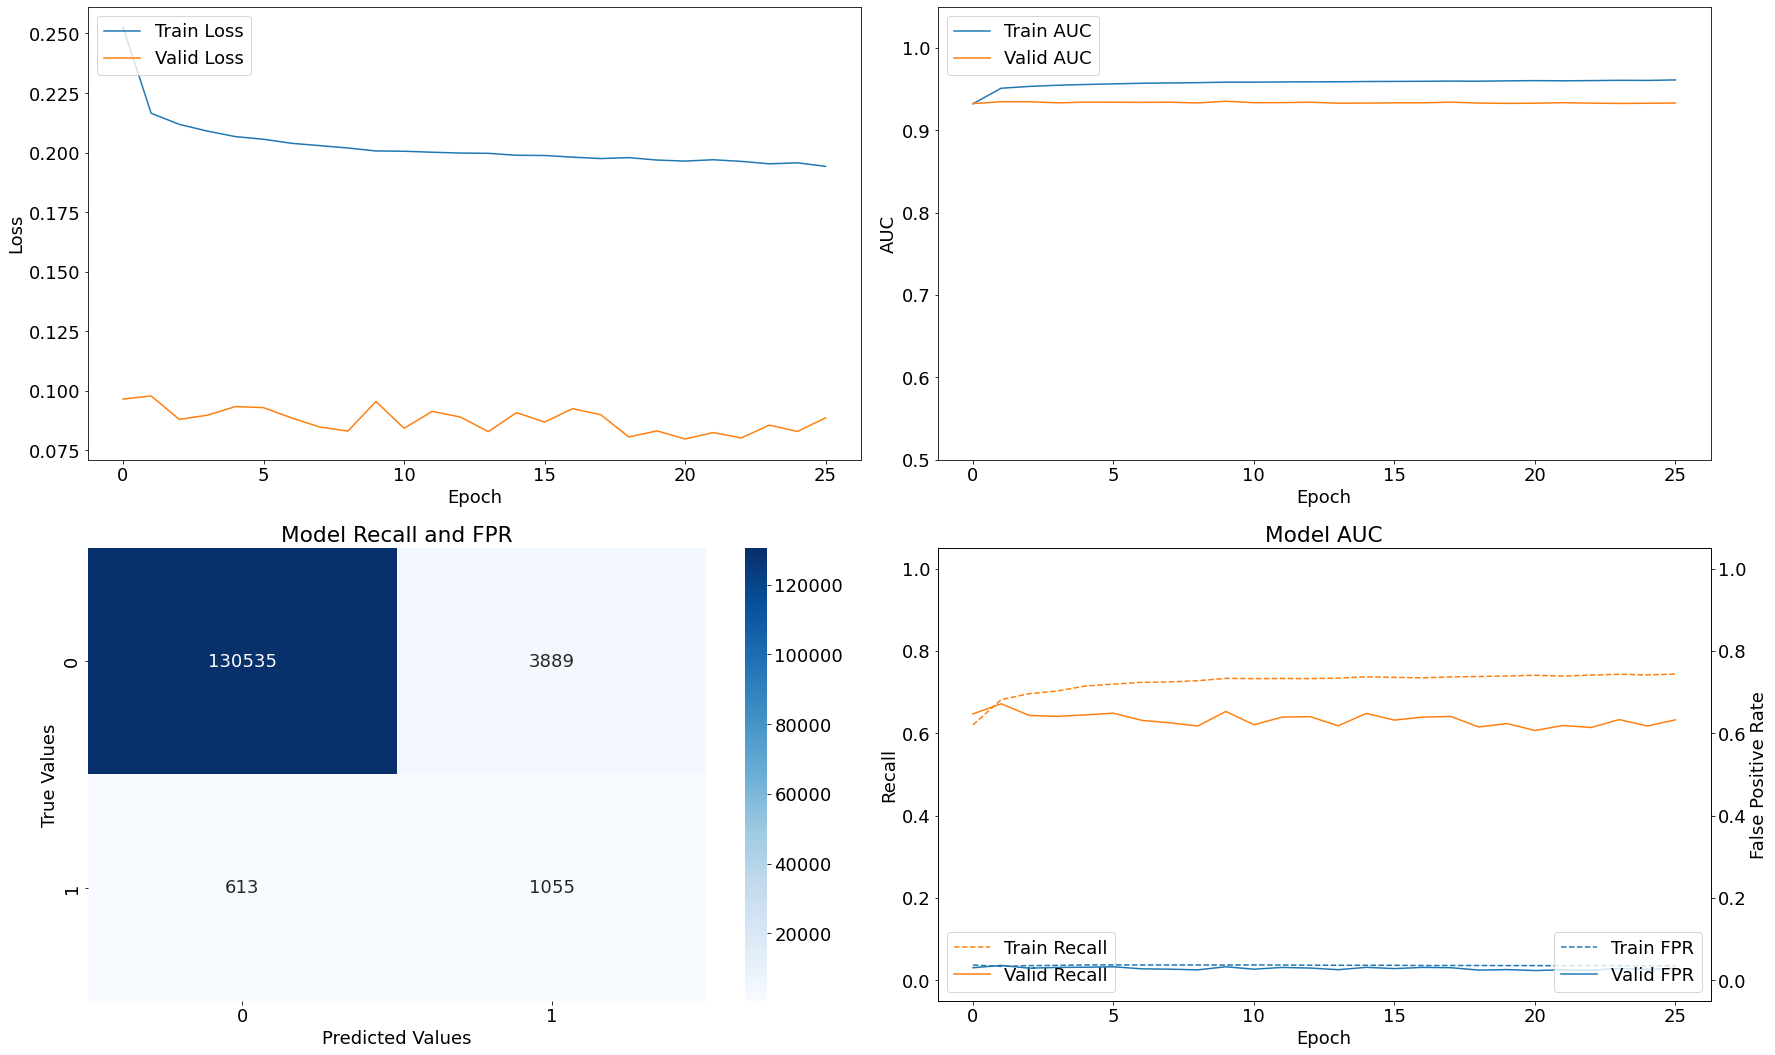

Epoch 00008: early stopping
Results for Base Model V4 with threshold = 0.4.

 Train f1: 0.7988595182562825 
 Val f1: 0.2931079309168364 

 Train Recall: 0.818947434425354 
 Val Recall: 0.6756594777107239 

 Train FPR: 0.05783585458993912 
 Val FPR: 0.036414626985788345


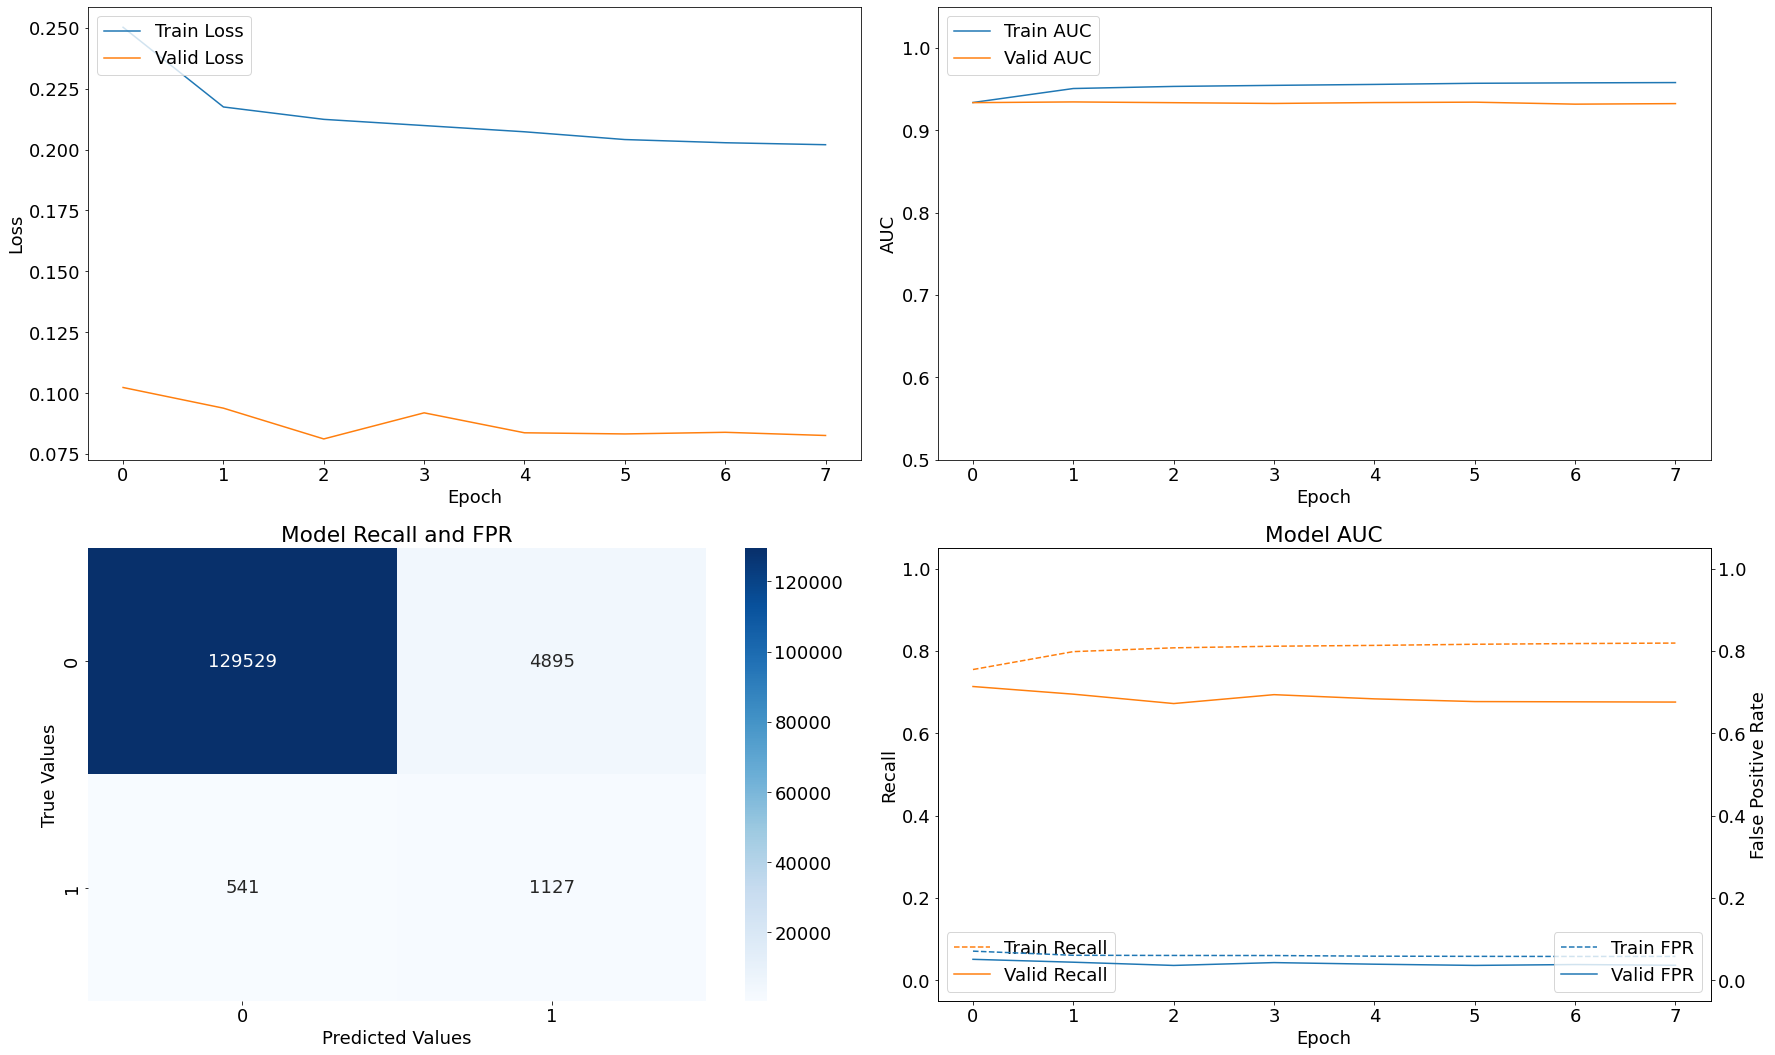

Epoch 00017: early stopping
Results for Base Model V4 with threshold = 0.3.

 Train f1: 0.7900462365453732 
 Val f1: 0.2386847609218821 

 Train Recall: 0.8702256679534912 
 Val Recall: 0.7224220633506775 

 Train FPR: 0.08318687975406647 
 Val FPR: 0.053740404546260834


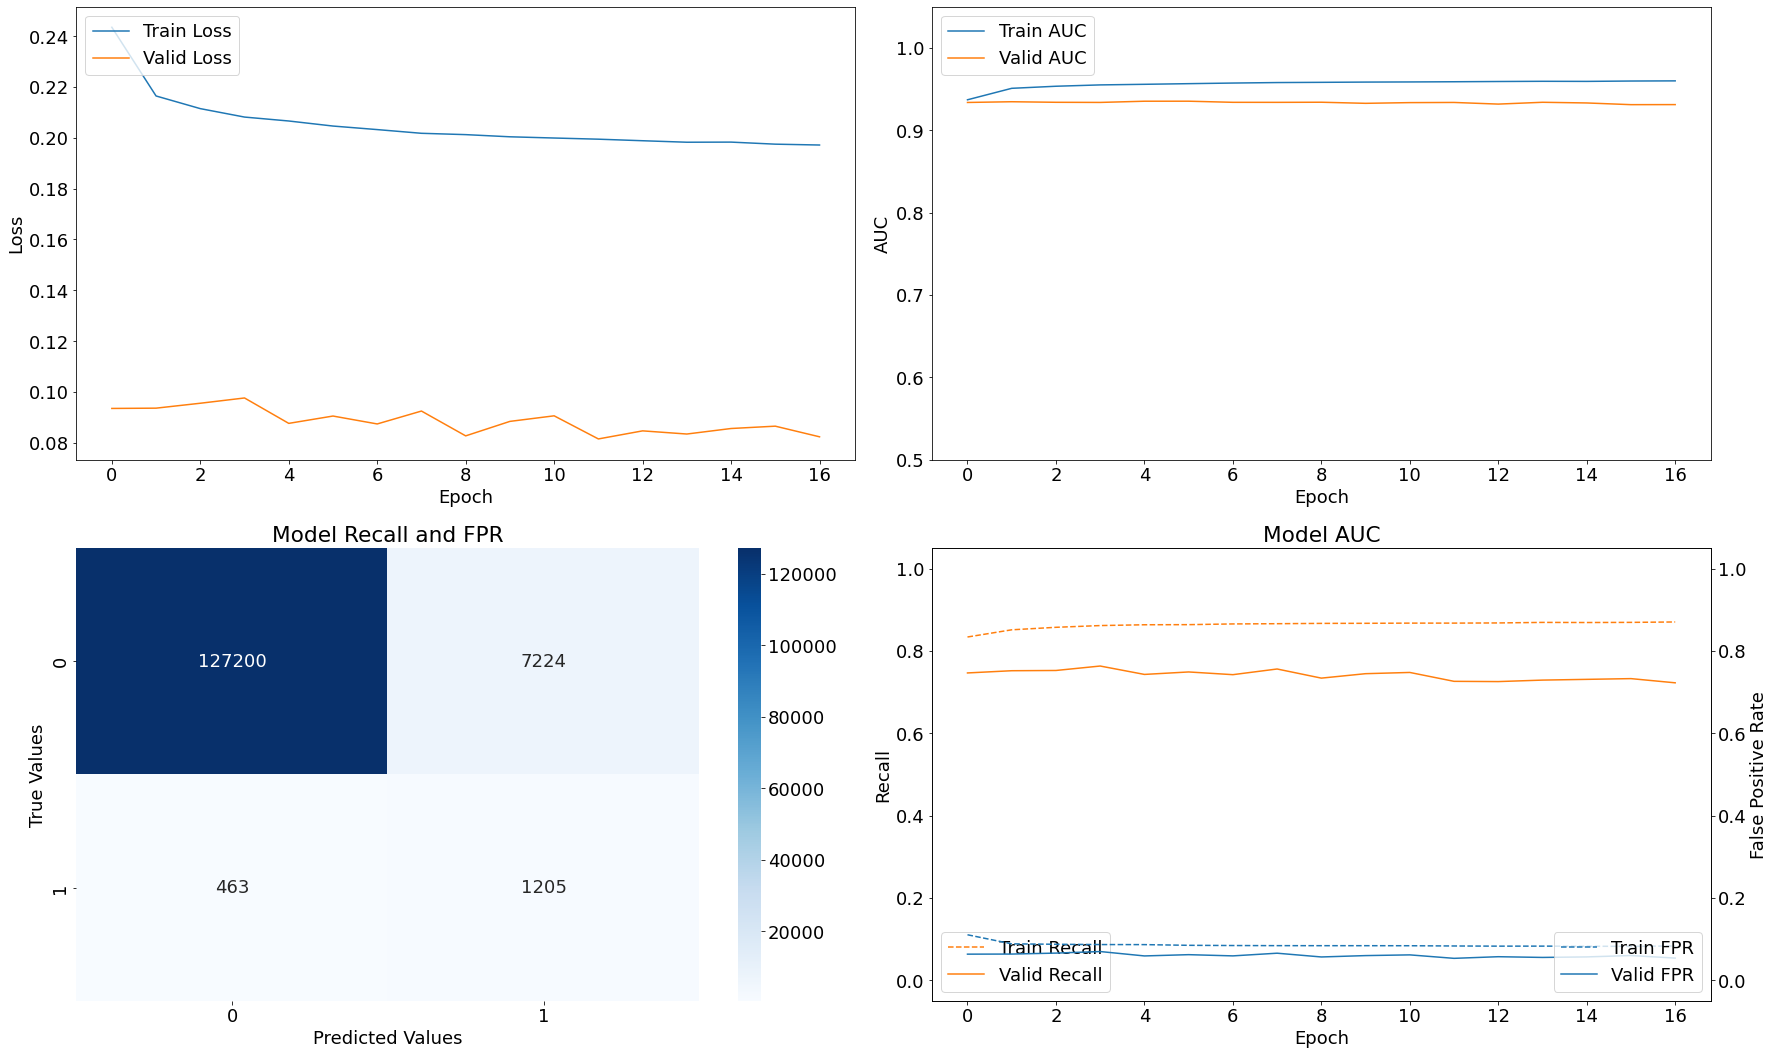

Epoch 00008: early stopping
Results for Base Model V4 with threshold = 0.2.

 Train f1: 0.7521851450686633 
 Val f1: 0.17028317251273226 

 Train Recall: 0.9120365381240845 
 Val Recall: 0.8021582961082458 

 Train FPR: 0.12824854254722595 
 Val FPR: 0.09454412758350372


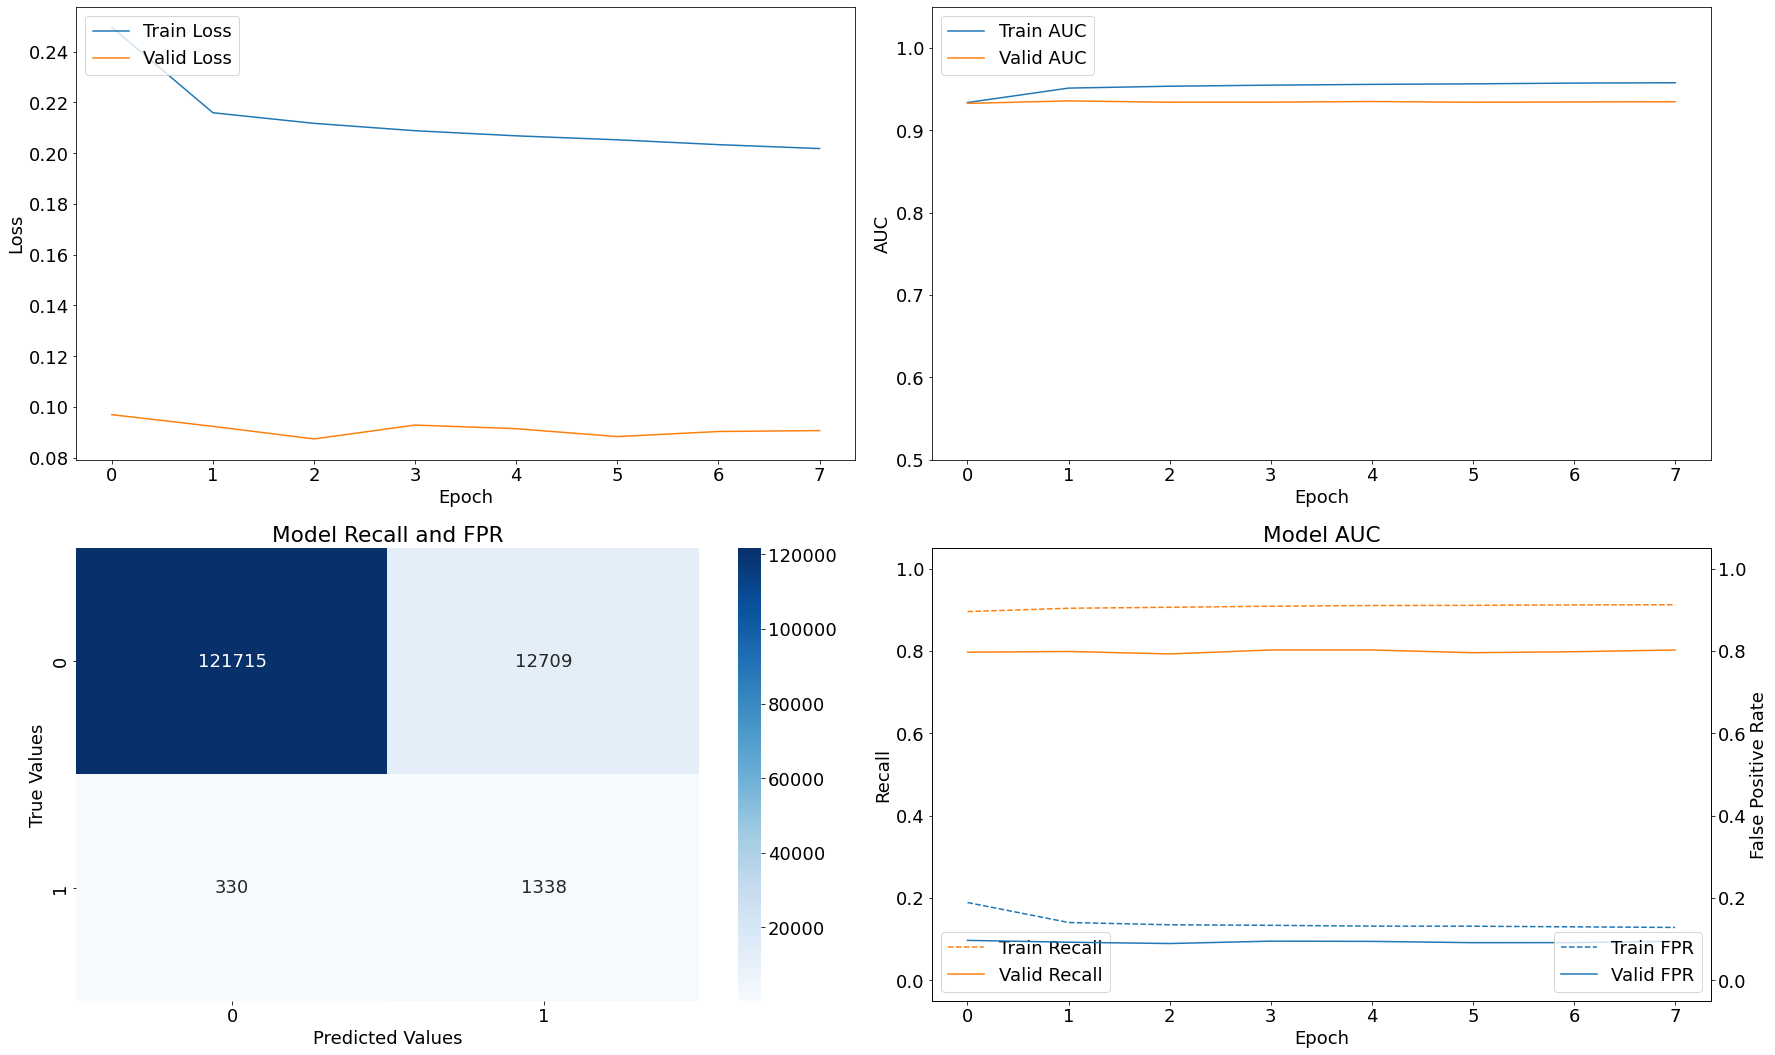

Epoch 00020: early stopping
Results for Base Model V4 with threshold = 0.1.

 Train f1: 0.6861126123348198 
 Val f1: 0.1307298110795053 

 Train Recall: 0.9557515978813171 
 Val Recall: 0.8489208817481995 

 Train FPR: 0.20755916833877563 
 Val FPR: 0.1382119208574295


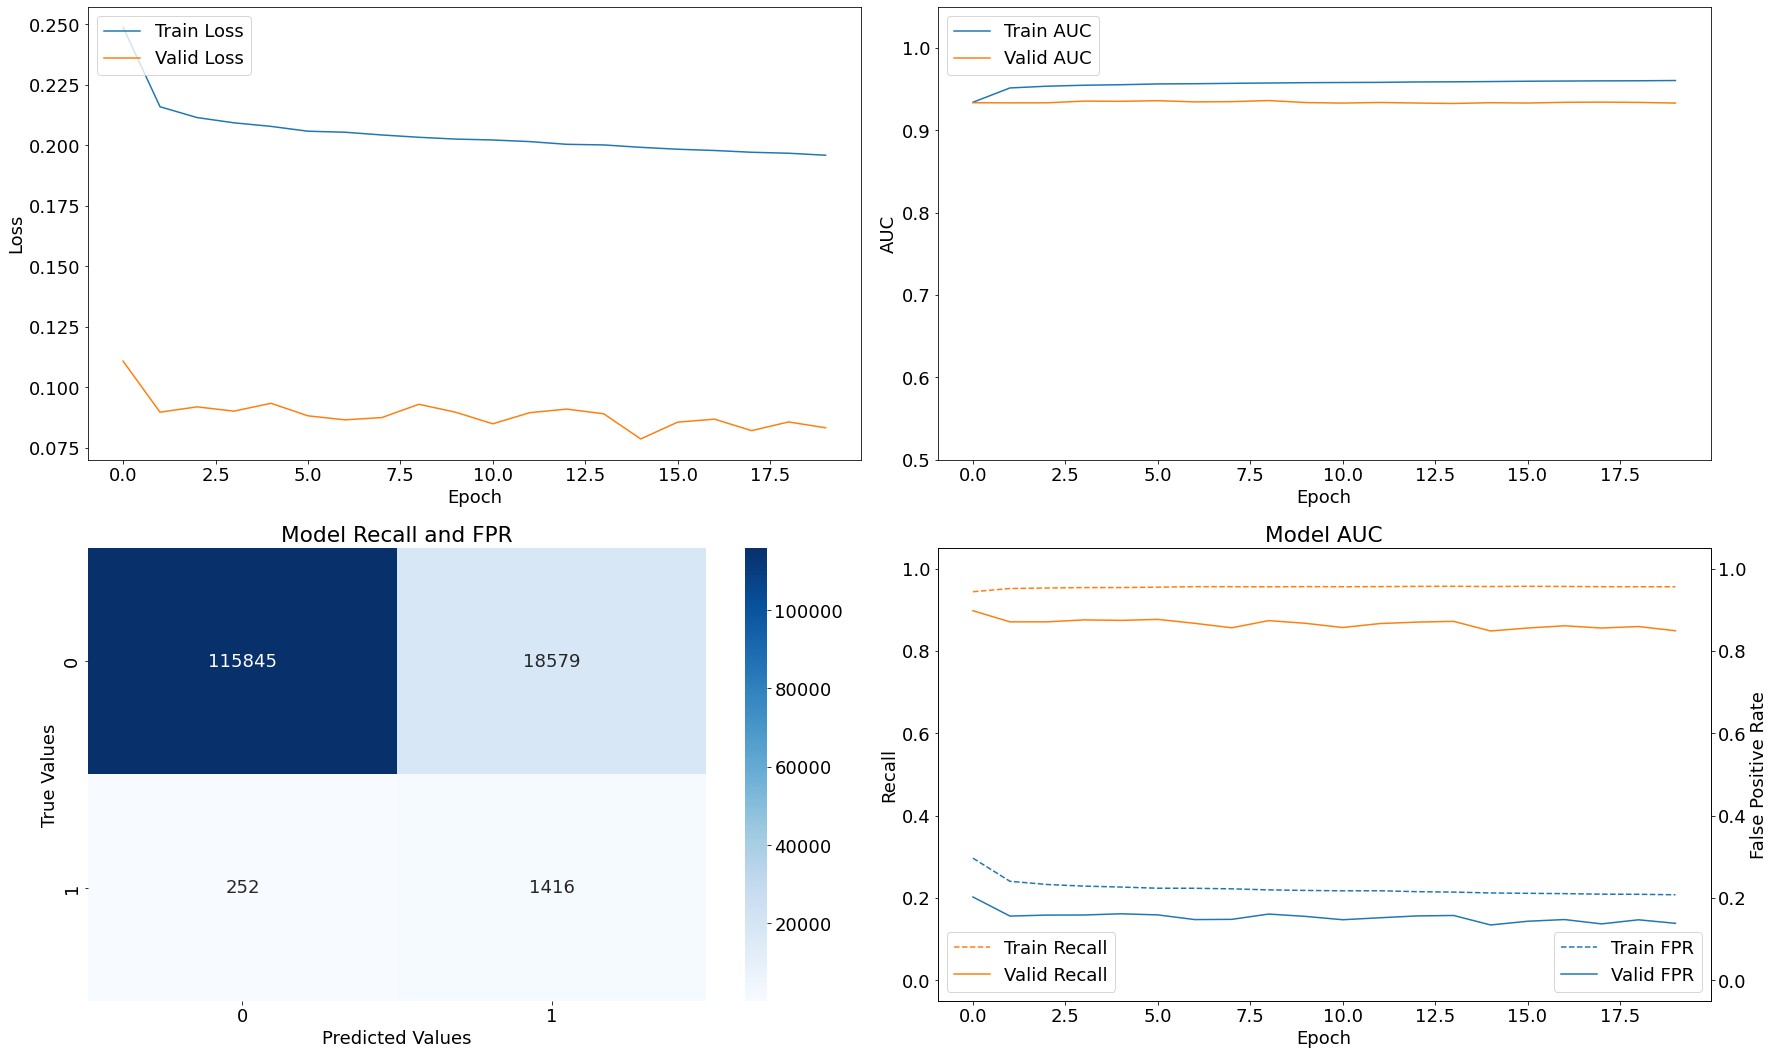

In [15]:
for t in thresholds:
    
    modelling_v4(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V4',
                 threshold=t)

---

### Fifth Model Iteration

In [16]:
def modelling_v5(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v5 = models.Sequential()

    model_v5.add(layers.Input(shape=(n_features, )))
    model_v5.add(layers.Dense(32, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(16, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(8, activation='relu'))
    model_v5.add(layers.Dropout(0.5))
    model_v5.add(layers.Dense(4, activation='relu'))
    model_v5.add(layers.Dense(2, activation='relu'))
    model_v5.add(layers.Dense(1, activation='sigmoid'))

    model_v5.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v5_history = model_v5.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v5,
             name,
             model_v5_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00013: early stopping
Results for Variant III Model V5 with threshold = 0.5.

 Train f1: 0.7746136931177464 
 Val f1: 0.30340471808218467 

 Train Recall: 0.7603887319564819 
 Val Recall: 0.6624700427055359 

 Train FPR: 0.050720714032649994 
 Val FPR: 0.03355799615383148


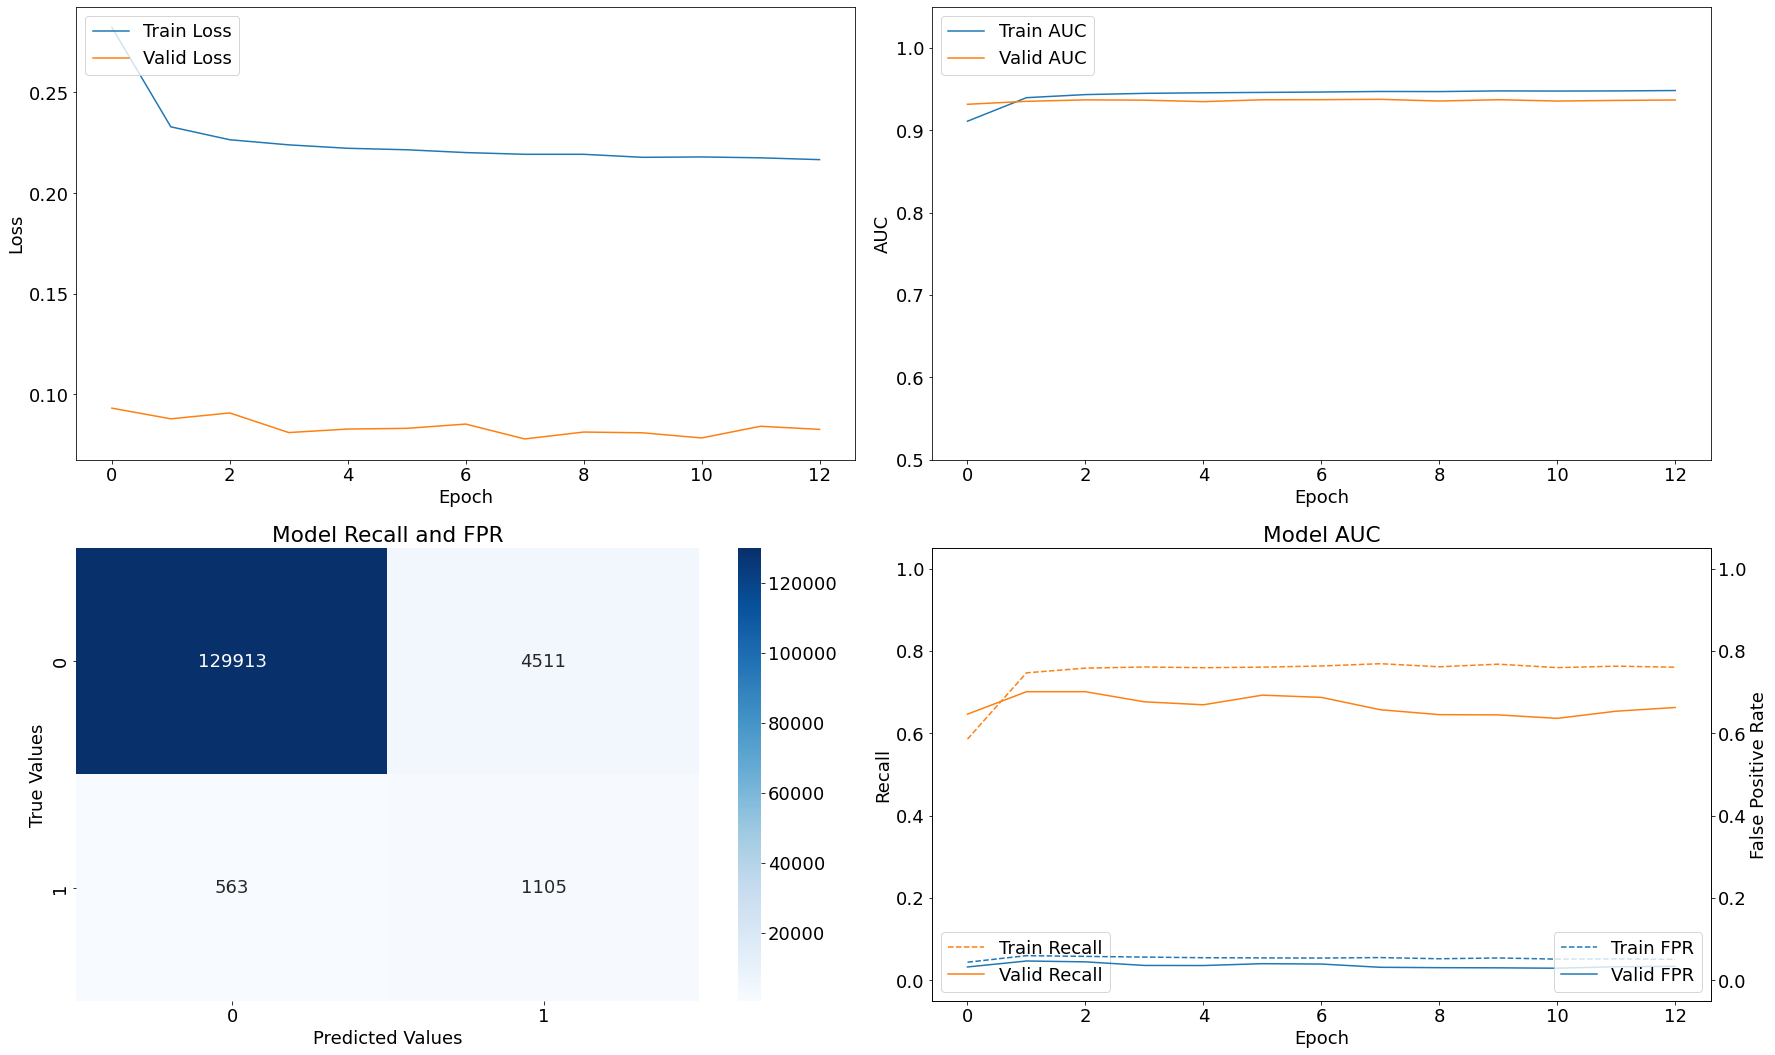

Epoch 00007: early stopping
Results for Variant III Model V5 with threshold = 0.4.

 Train f1: 0.7474432476677765 
 Val f1: 0.29064747627116433 

 Train Recall: 0.7936603426933289 
 Val Recall: 0.6660671234130859 

 Train FPR: 0.08250150084495544 
 Val FPR: 0.03619889169931412


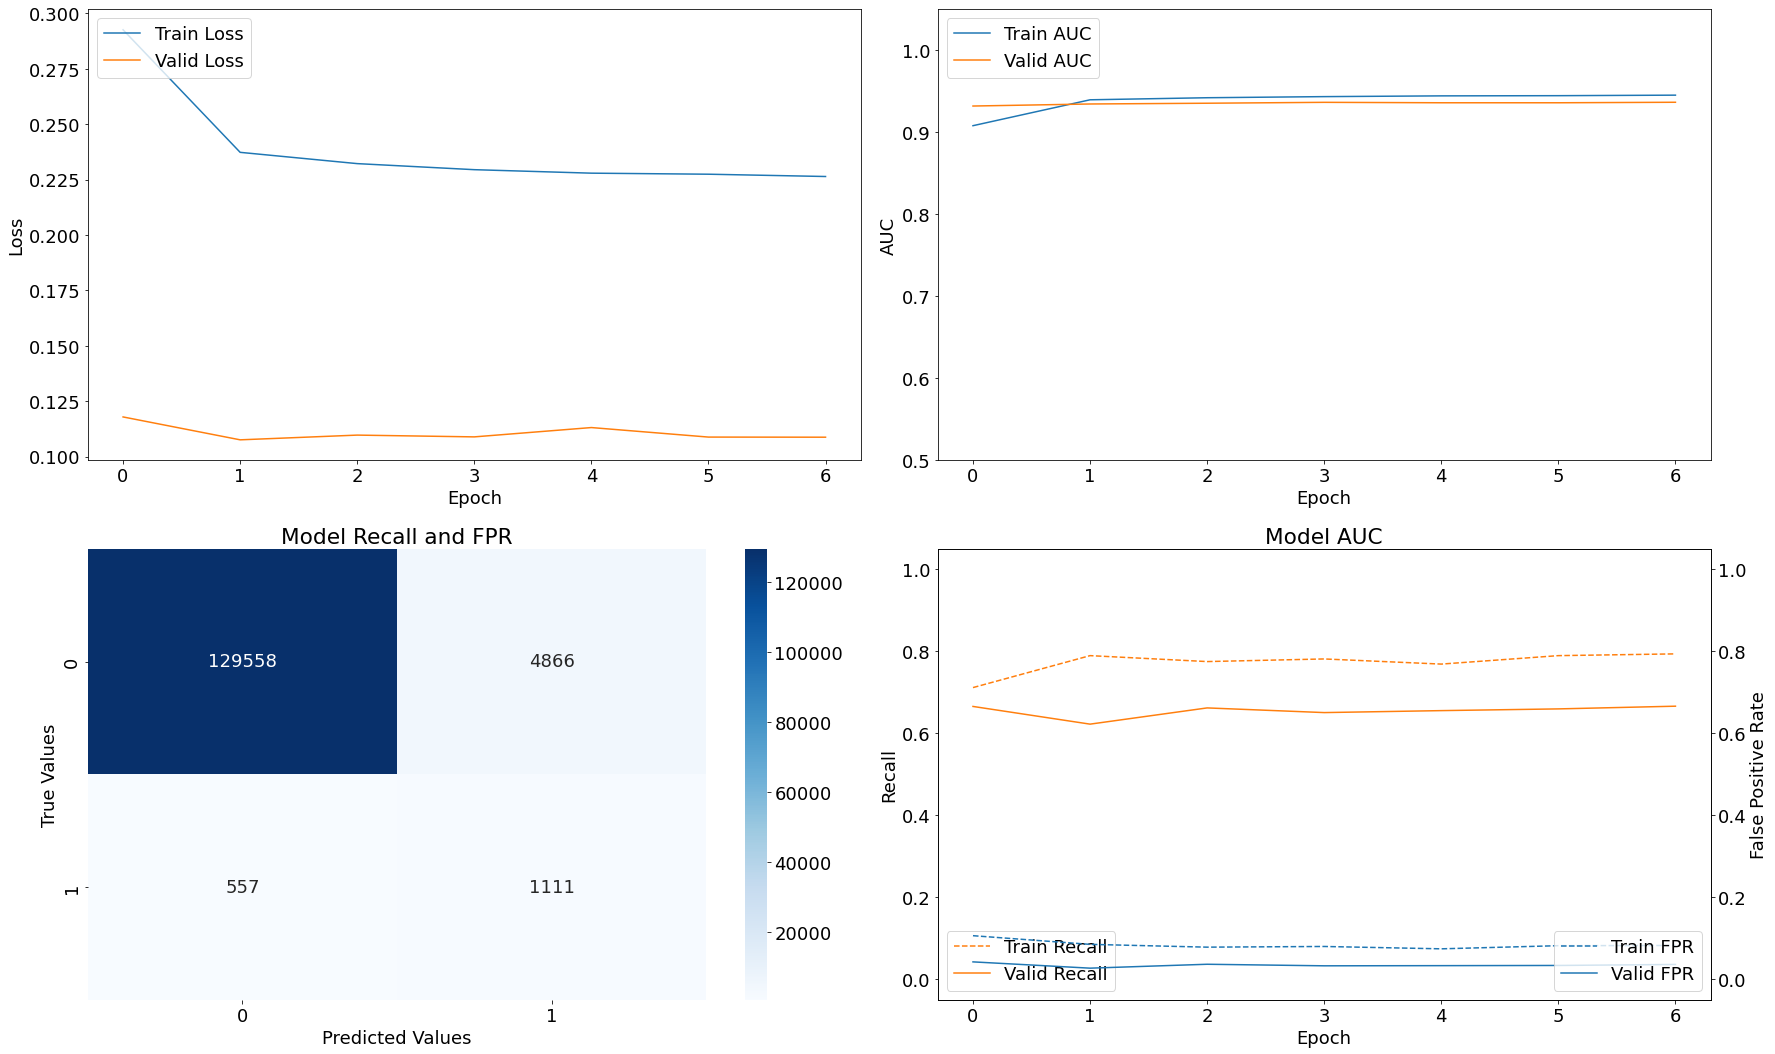

Epoch 00013: early stopping
Results for Variant III Model V5 with threshold = 0.3.

 Train f1: 0.7621519869668202 
 Val f1: 0.2120648886888245 

 Train Recall: 0.8464213609695435 
 Val Recall: 0.7523980736732483 

 Train FPR: 0.09367824345827103 
 Val FPR: 0.06630512326955795


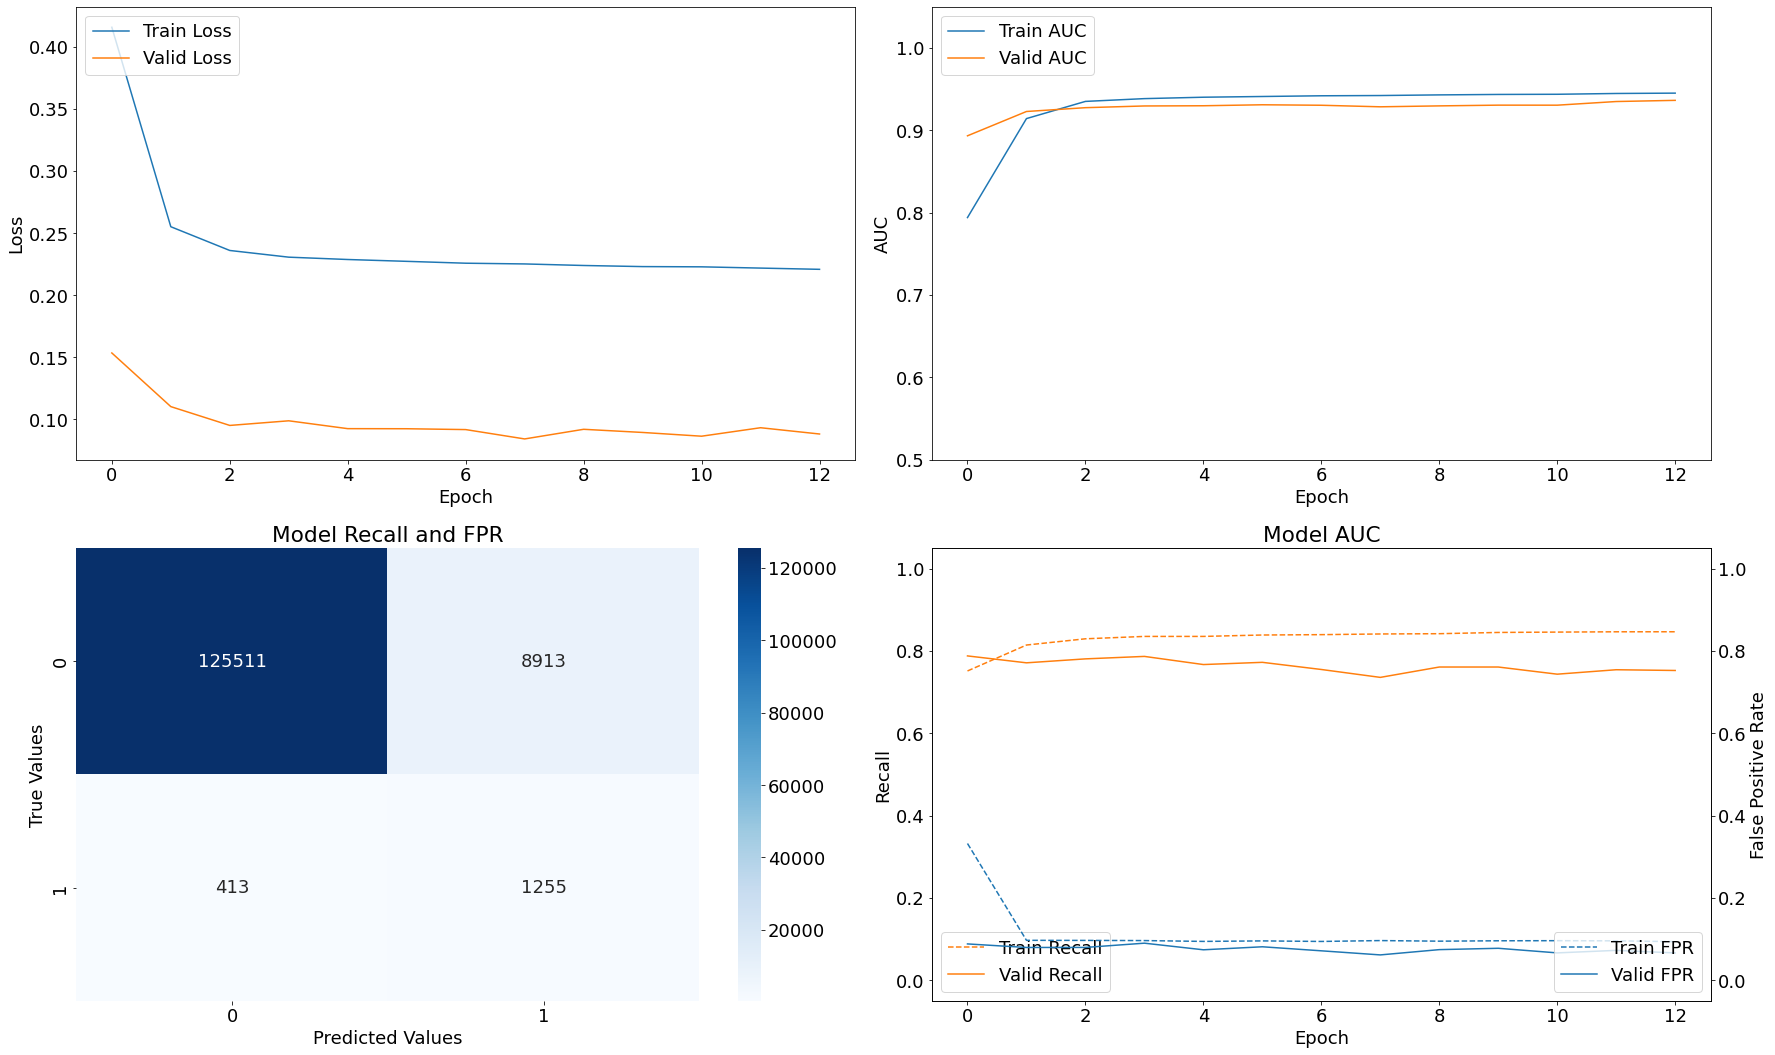

Epoch 00006: early stopping
Results for Variant III Model V5 with threshold = 0.2.

 Train f1: 0.7340638489448418 
 Val f1: 0.1518889324518115 

 Train Recall: 0.8873841762542725 
 Val Recall: 0.8231415152549744 

 Train FPR: 0.13258616626262665 
 Val FPR: 0.11186990141868591


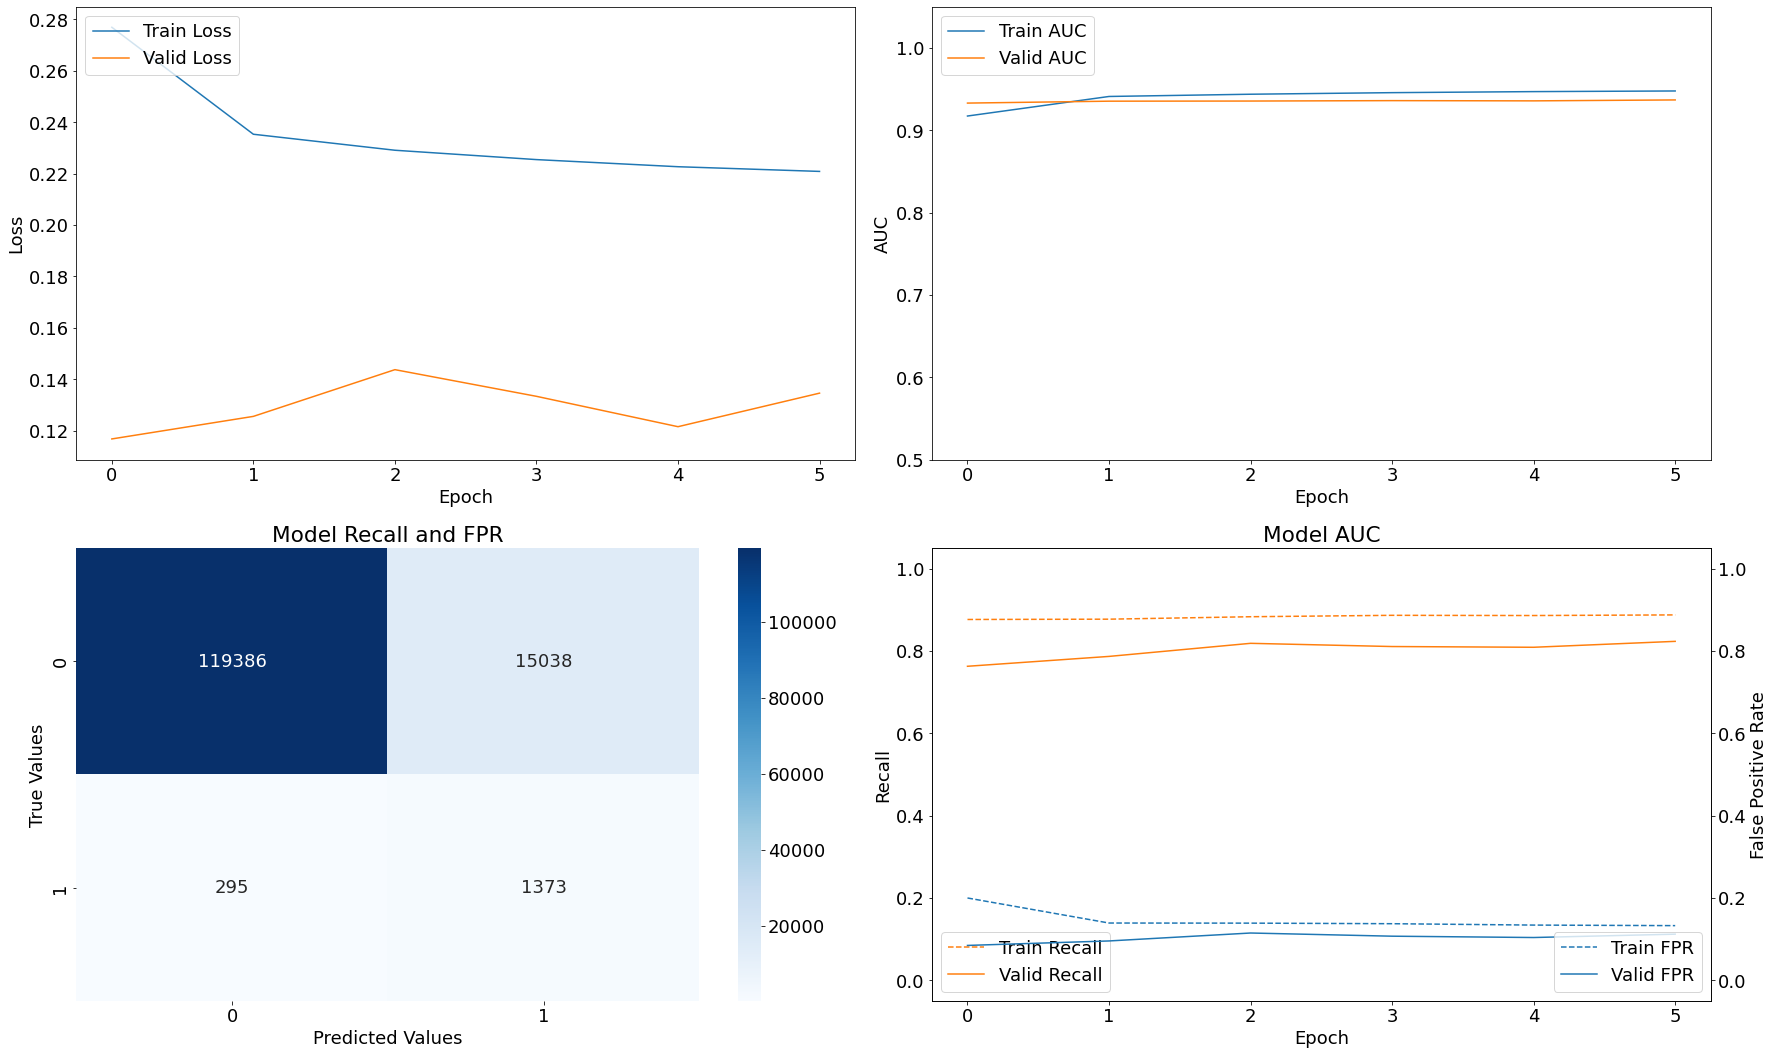

Epoch 00016: early stopping
Results for Variant III Model V5 with threshold = 0.1.

 Train f1: 0.7153444457922805 
 Val f1: 0.16737746238558962 

 Train Recall: 0.9143193960189819 
 Val Recall: 0.811750590801239 

 Train FPR: 0.16049602627754211 
 Val FPR: 0.09787686914205551


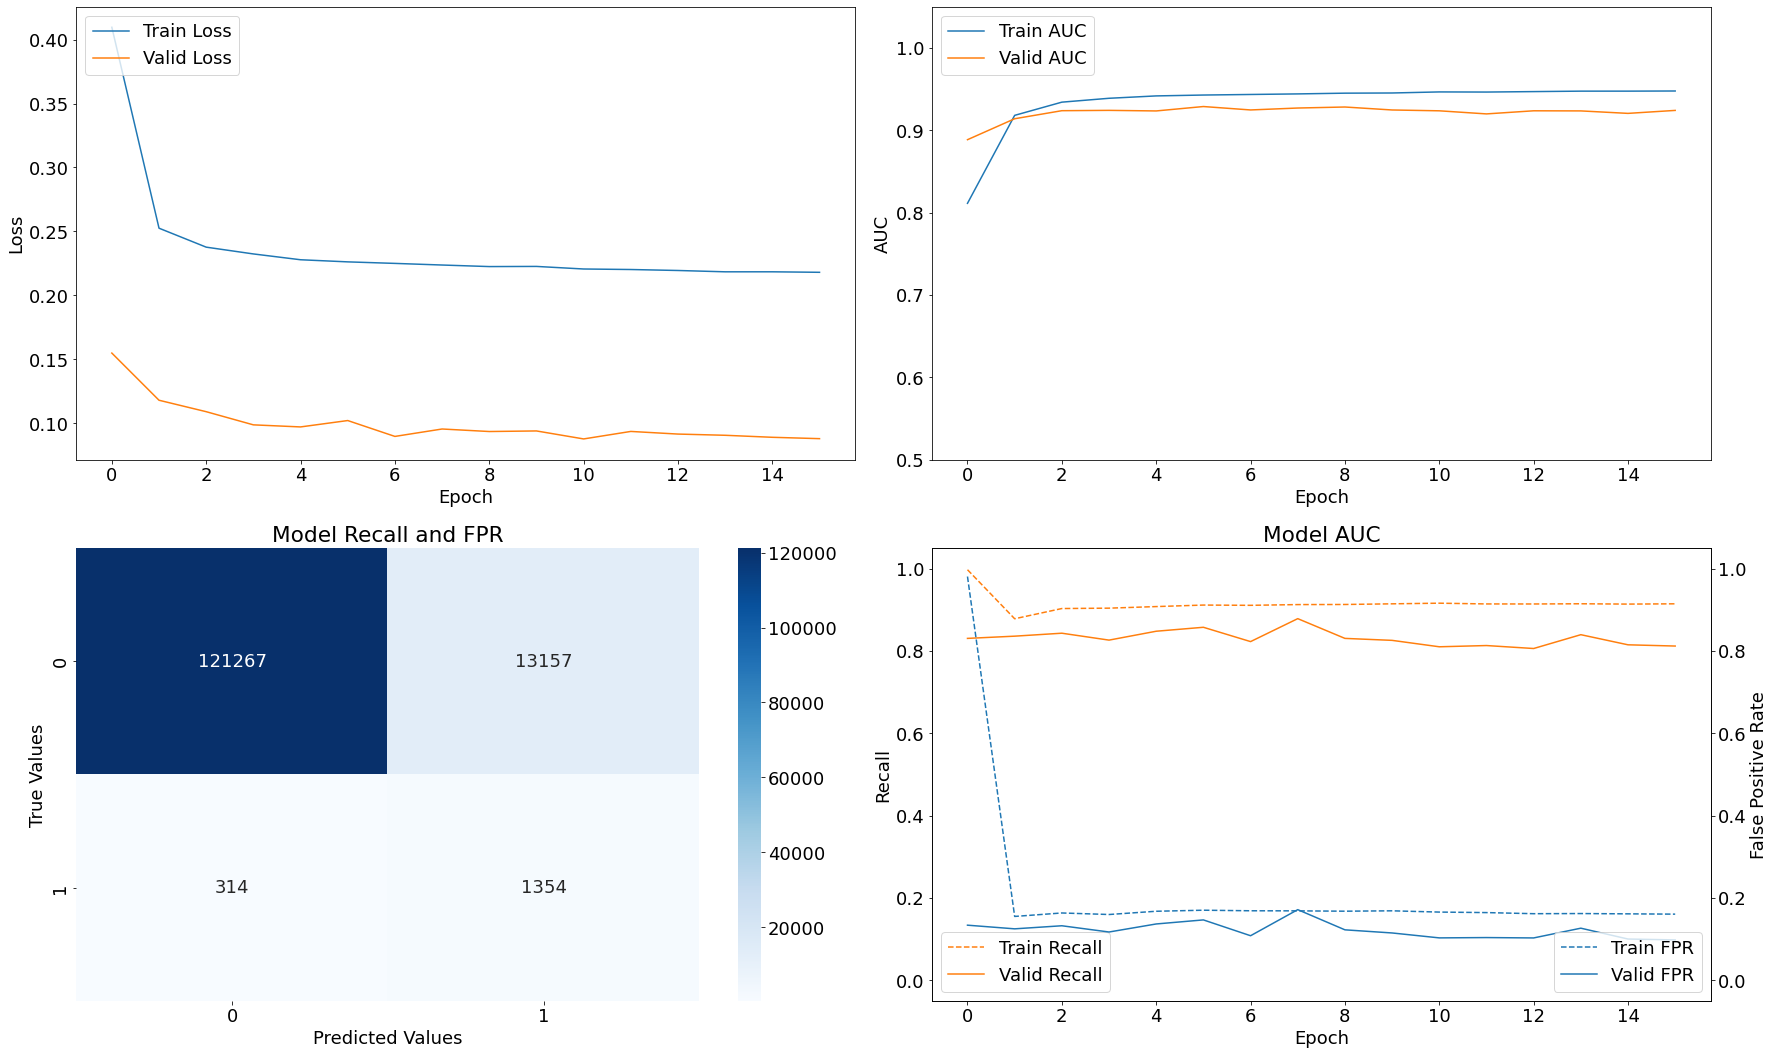

In [17]:
for t in thresholds:
    
    modelling_v5(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V5',
                 threshold=t)

---

### Sixth Model Iteration

In [18]:
def modelling_v6(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):     
    
    model_v6 = models.Sequential()

    model_v6.add(layers.Input(shape=(n_features, )))
    model_v6.add(layers.Dense(32, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(16, kernel_initializer='lecun_normal', activation='selu'))
    model_v6.add(layers.AlphaDropout(0.25))
    model_v6.add(layers.Dense(1, activation='sigmoid'))

    model_v6.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v6_history = model_v6.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v6,
             name,
             model_v6_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00009: early stopping
Results for Variant III Model V6 with threshold = 0.5.

 Train f1: 0.789132512718054 
 Val f1: 0.3105344745780865 

 Train Recall: 0.7395926117897034 
 Val Recall: 0.6600719690322876 

 Train FPR: 0.03371291235089302 
 Val FPR: 0.032151997089385986


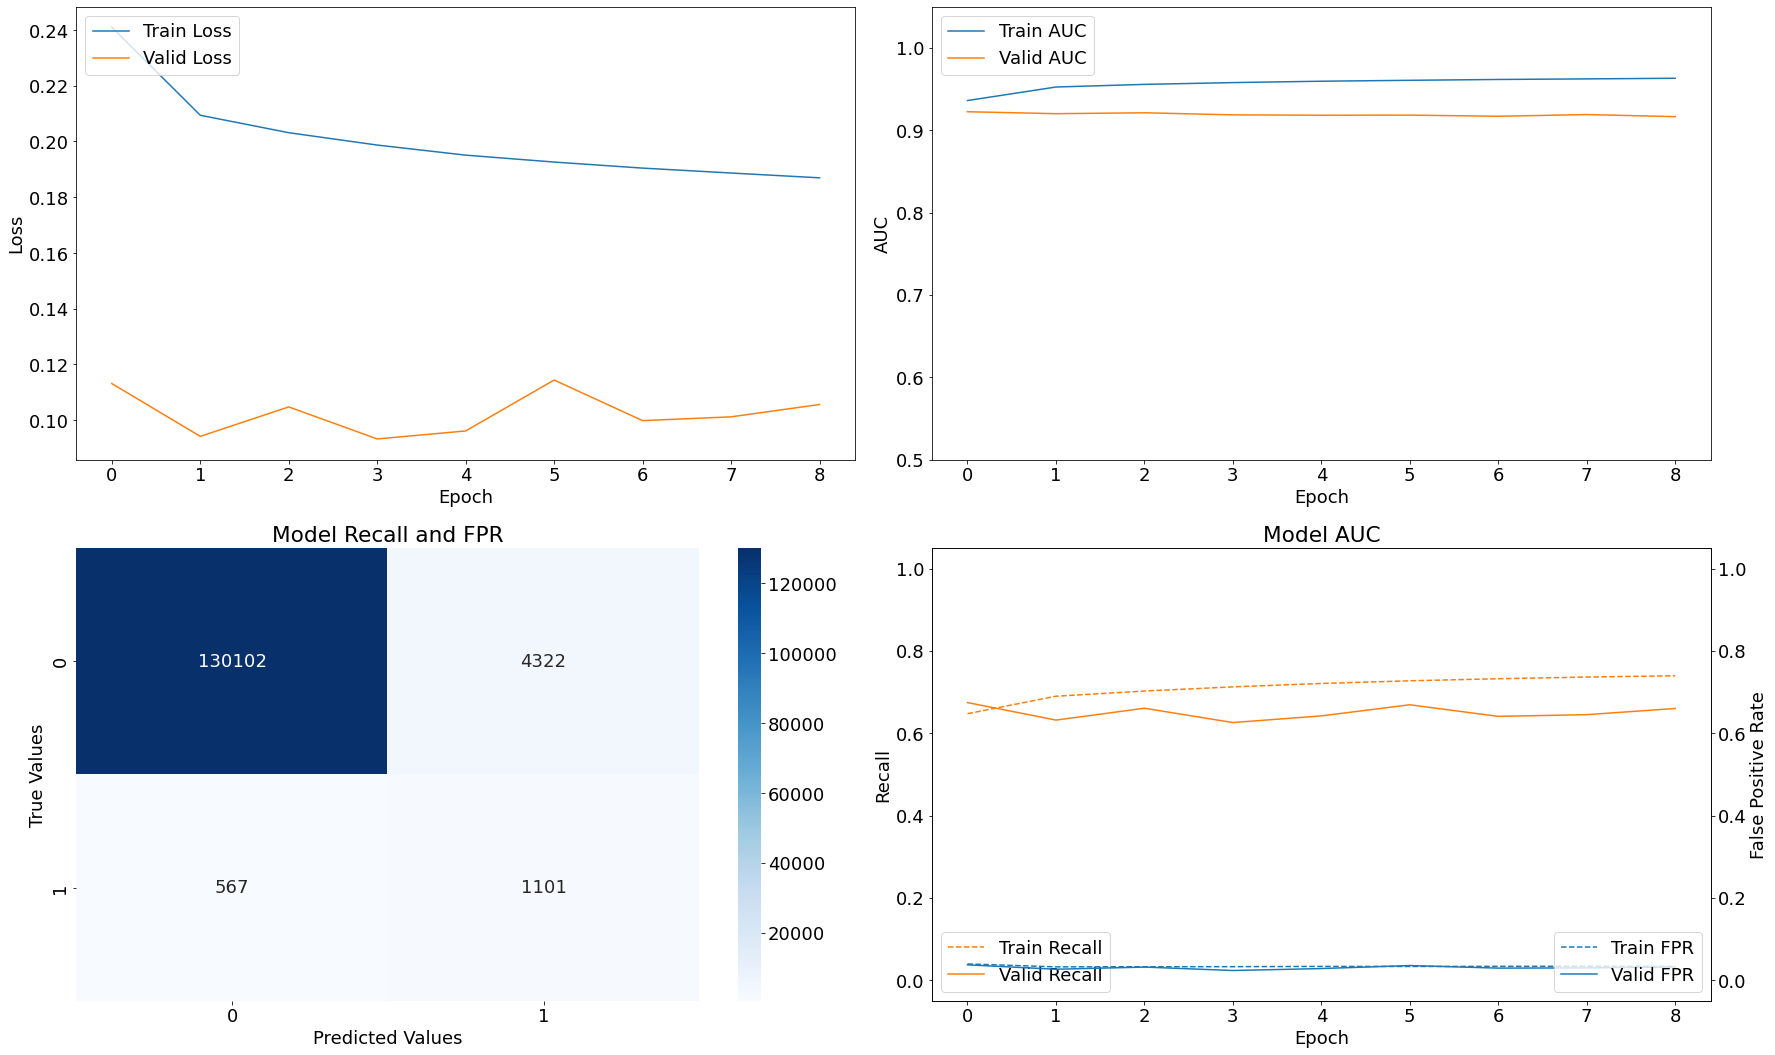

Epoch 00006: early stopping
Results for Variant III Model V6 with threshold = 0.4.

 Train f1: 0.7939652946846912 
 Val f1: 0.22913561246204112 

 Train Recall: 0.8138750791549683 
 Val Recall: 0.7374100685119629 

 Train FPR: 0.05906927213072777 
 Val FPR: 0.058308038860559464


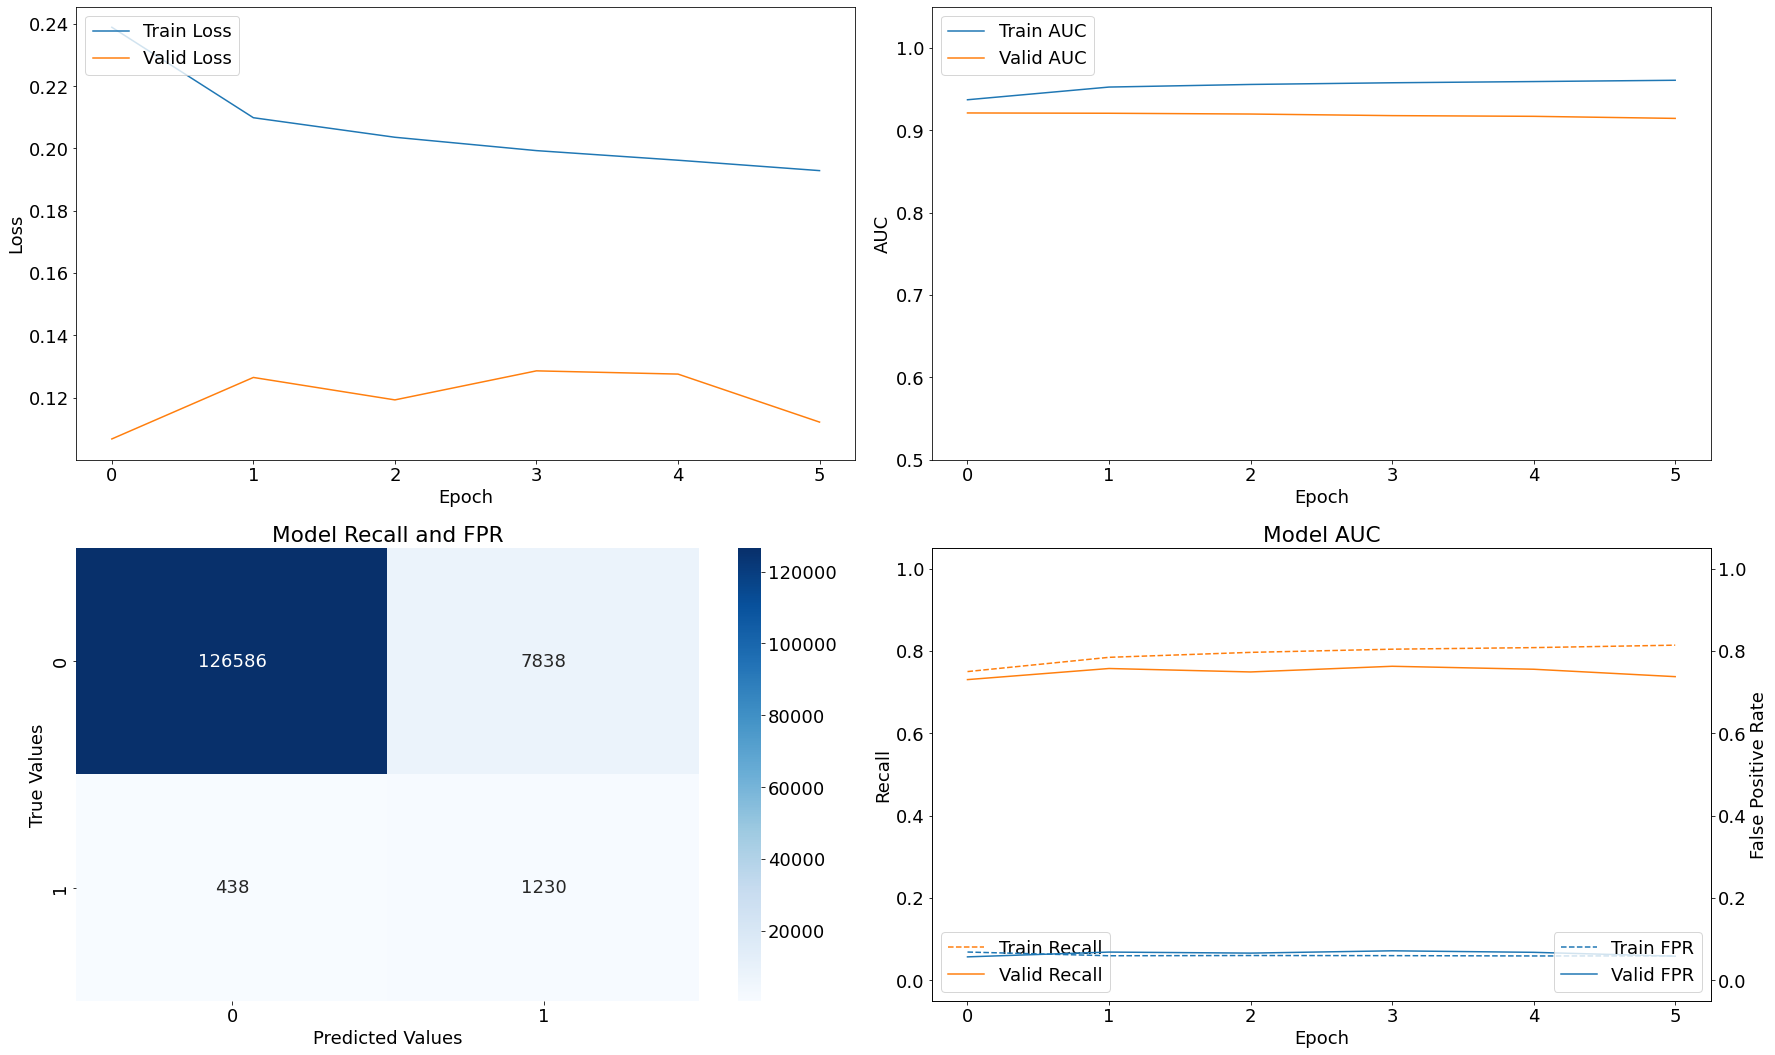

Epoch 00008: early stopping
Results for Variant III Model V6 with threshold = 0.3.

 Train f1: 0.79707737808318 
 Val f1: 0.23933320067106145 

 Train Recall: 0.8599849343299866 
 Val Recall: 0.7230215668678284 

 Train FPR: 0.07446496188640594 
 Val FPR: 0.05359162017703056


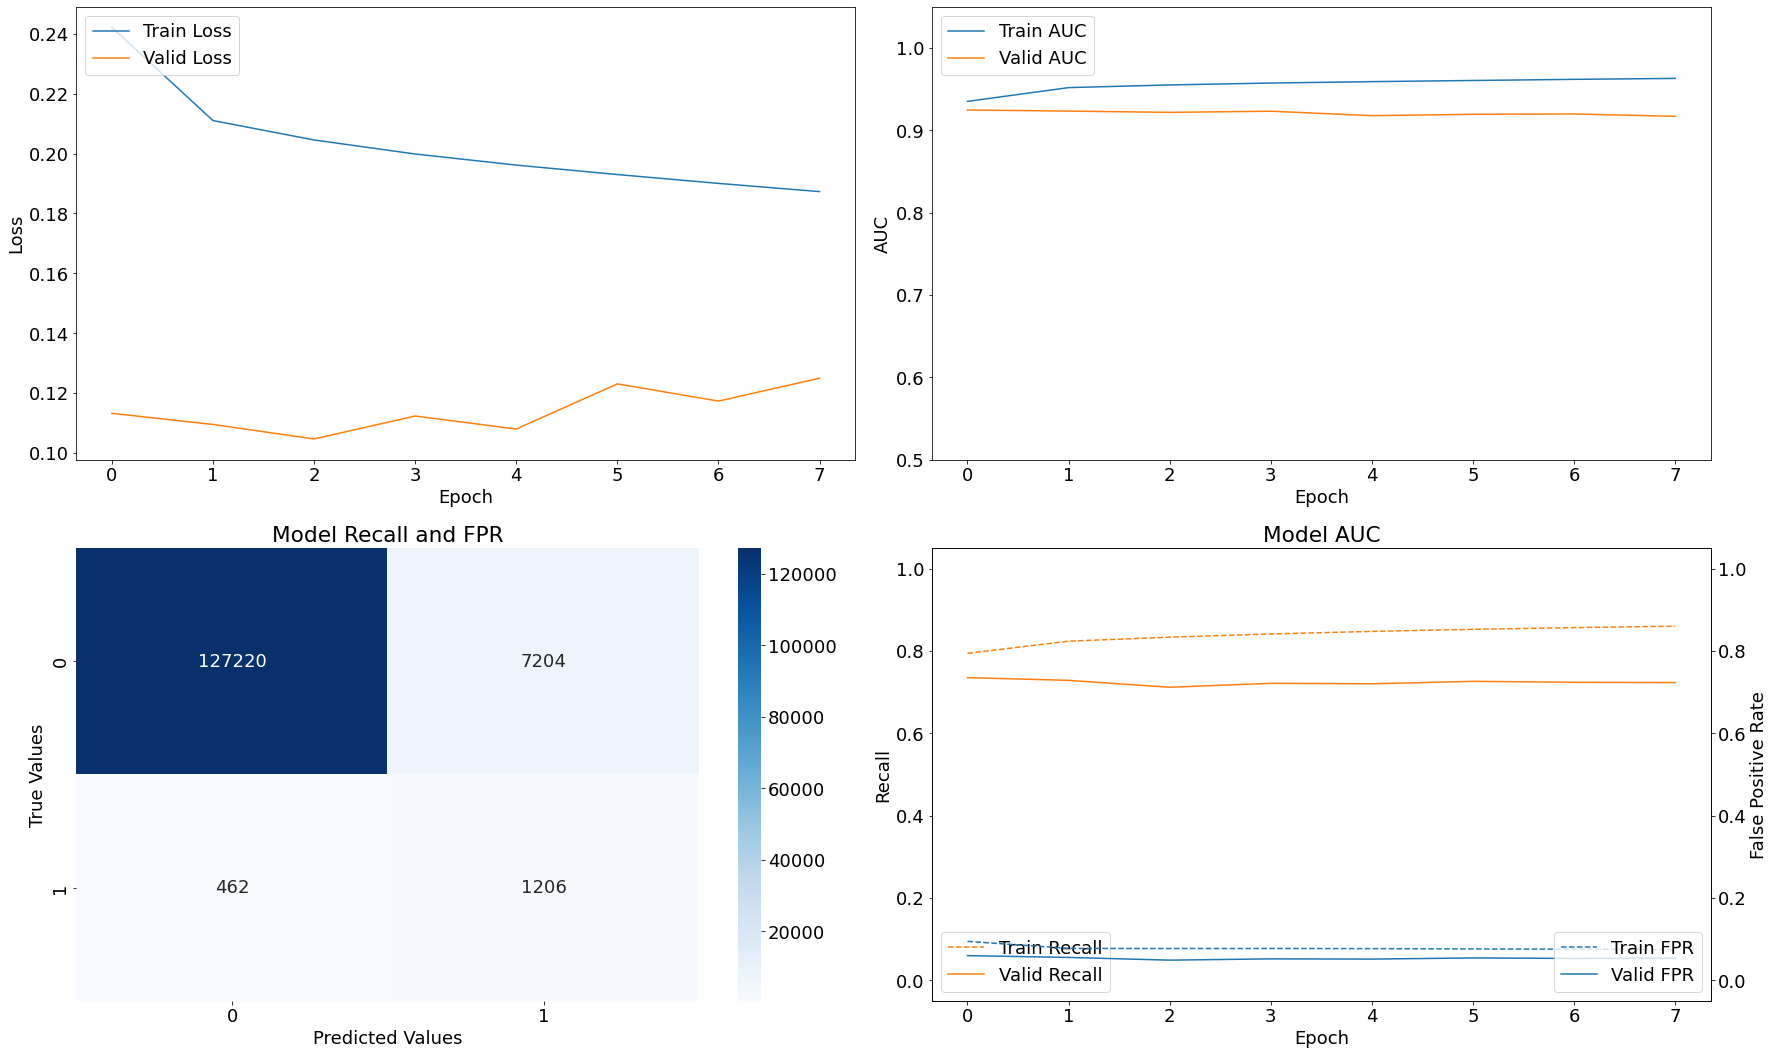

Epoch 00007: early stopping
Results for Variant III Model V6 with threshold = 0.2.

 Train f1: 0.7597050934948175 
 Val f1: 0.18627028599745774 

 Train Recall: 0.9114925265312195 
 Val Recall: 0.7775779366493225 

 Train FPR: 0.12202546745538712 
 Val FPR: 0.08154049515724182


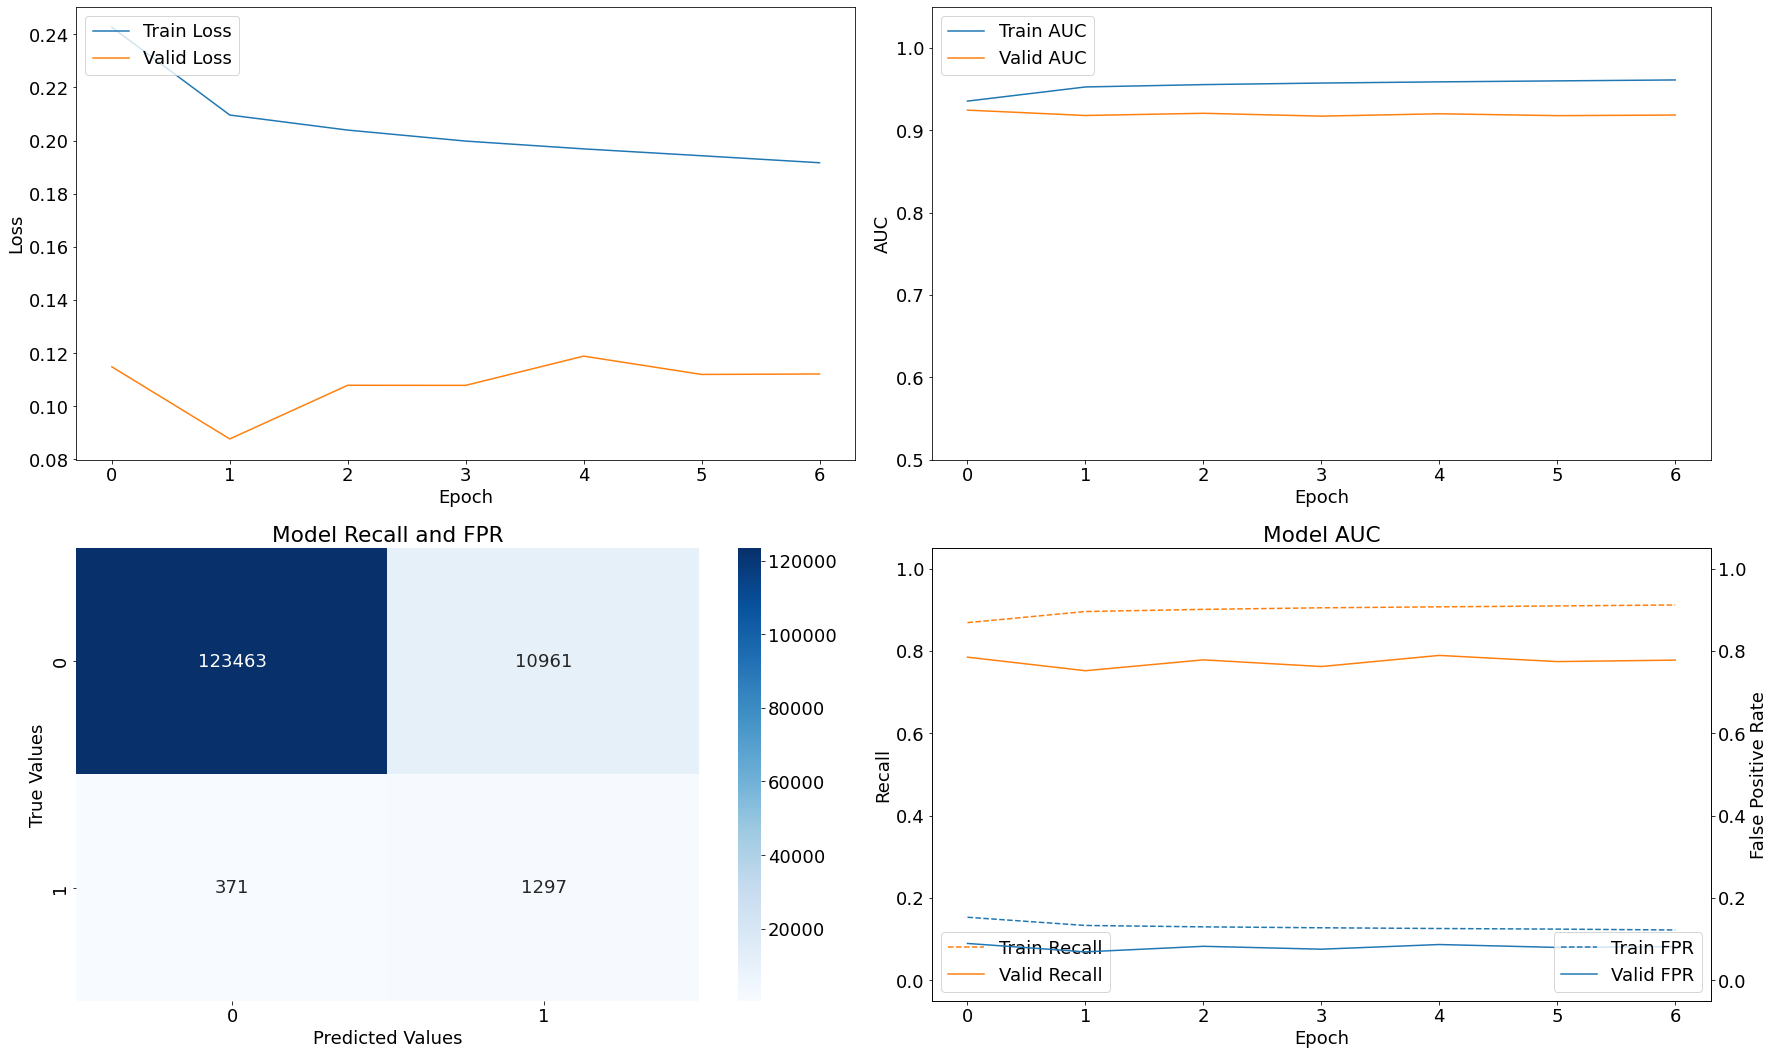

Epoch 00008: early stopping
Results for Variant III Model V6 with threshold = 0.1.

 Train f1: 0.7020180651796251 
 Val f1: 0.1491748416661927 

 Train Recall: 0.9517459869384766 
 Val Recall: 0.8291366696357727 

 Train FPR: 0.18992732465267181 
 Val FPR: 0.11523983627557755


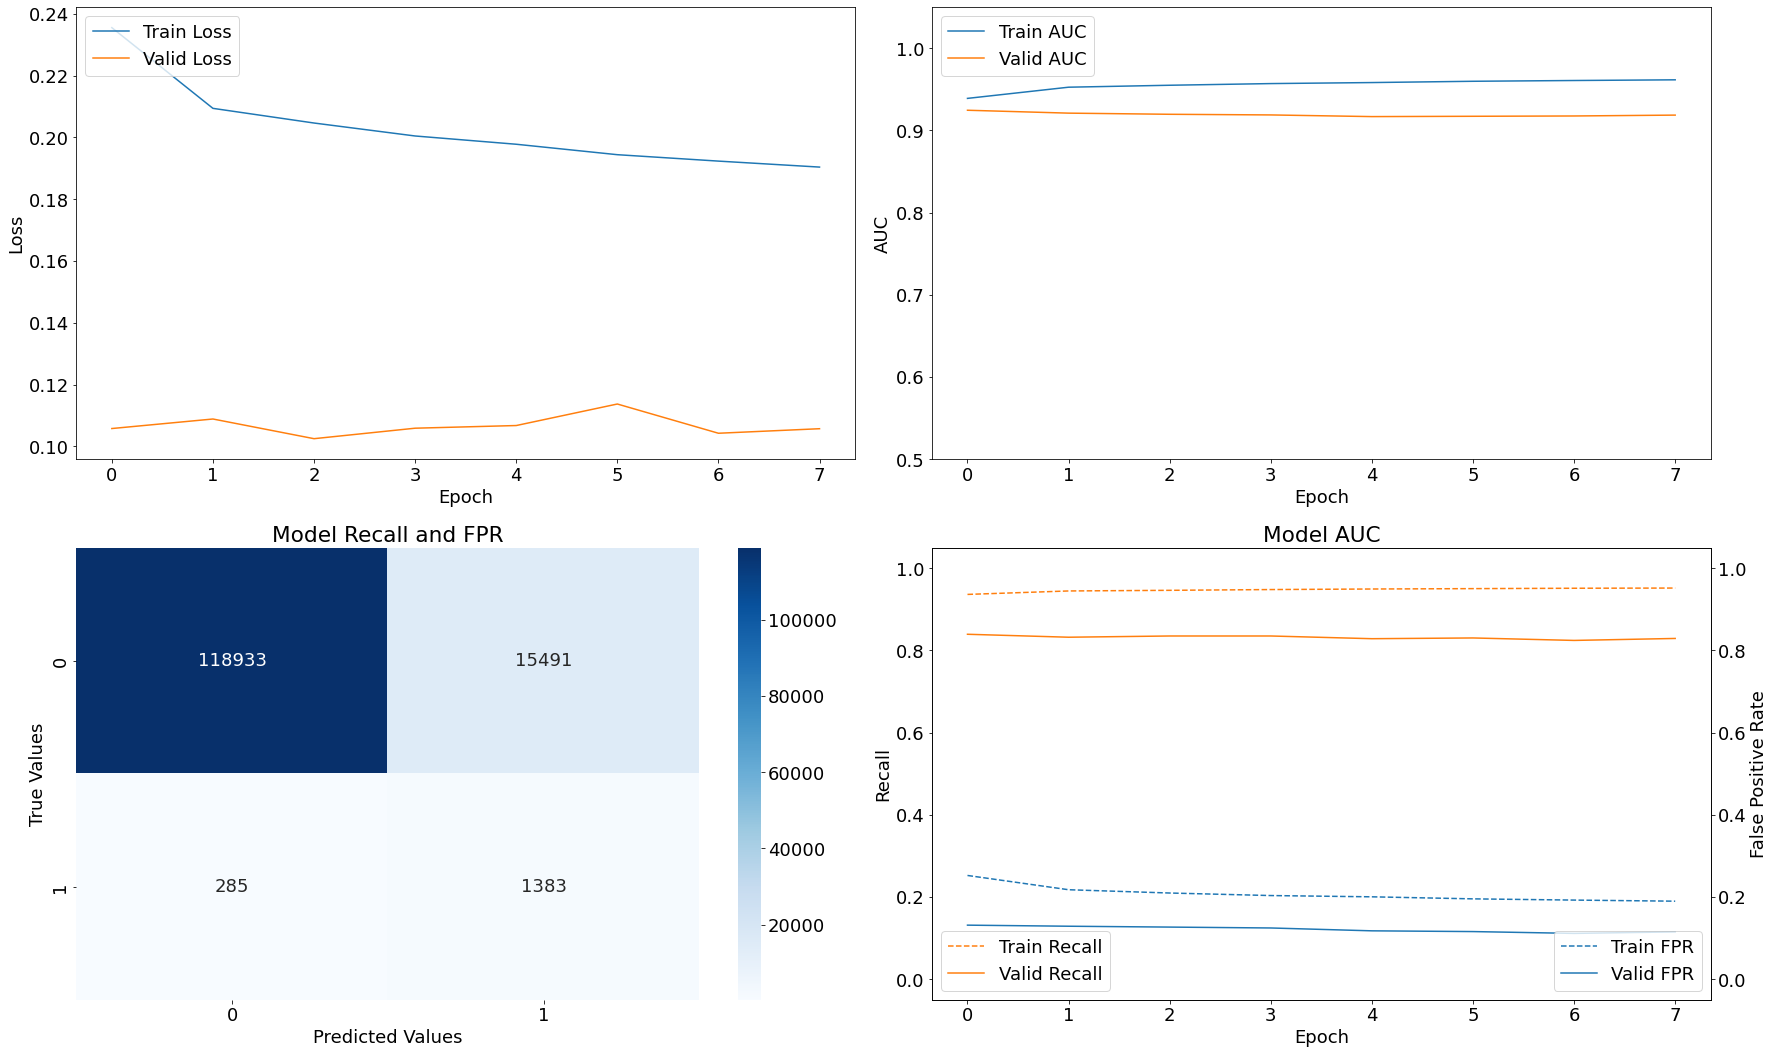

In [19]:
for t in thresholds:
    
    modelling_v6(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V6',
                 threshold=t)

---

### Seventh Model Iteration

In [20]:
def modelling_v7(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5): 

    model_v7 = models.Sequential()

    model_v7.add(layers.Input(shape=(n_features, )))
    model_v7.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v7.add(layers.AlphaDropout(0.25))
    model_v7.add(layers.Dense(1, activation='sigmoid'))

    model_v7.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v7_history = model_v7.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v7,
             name,
             model_v7_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00010: early stopping
Results for Variant III Model V7 with threshold = 0.5.

 Train f1: 0.6523806962546891 
 Val f1: 0.29909412915577493 

 Train Recall: 0.5567159056663513 
 Val Recall: 0.5839328765869141 

 Train FPR: 0.03750116750597954 
 Val FPR: 0.02879694104194641


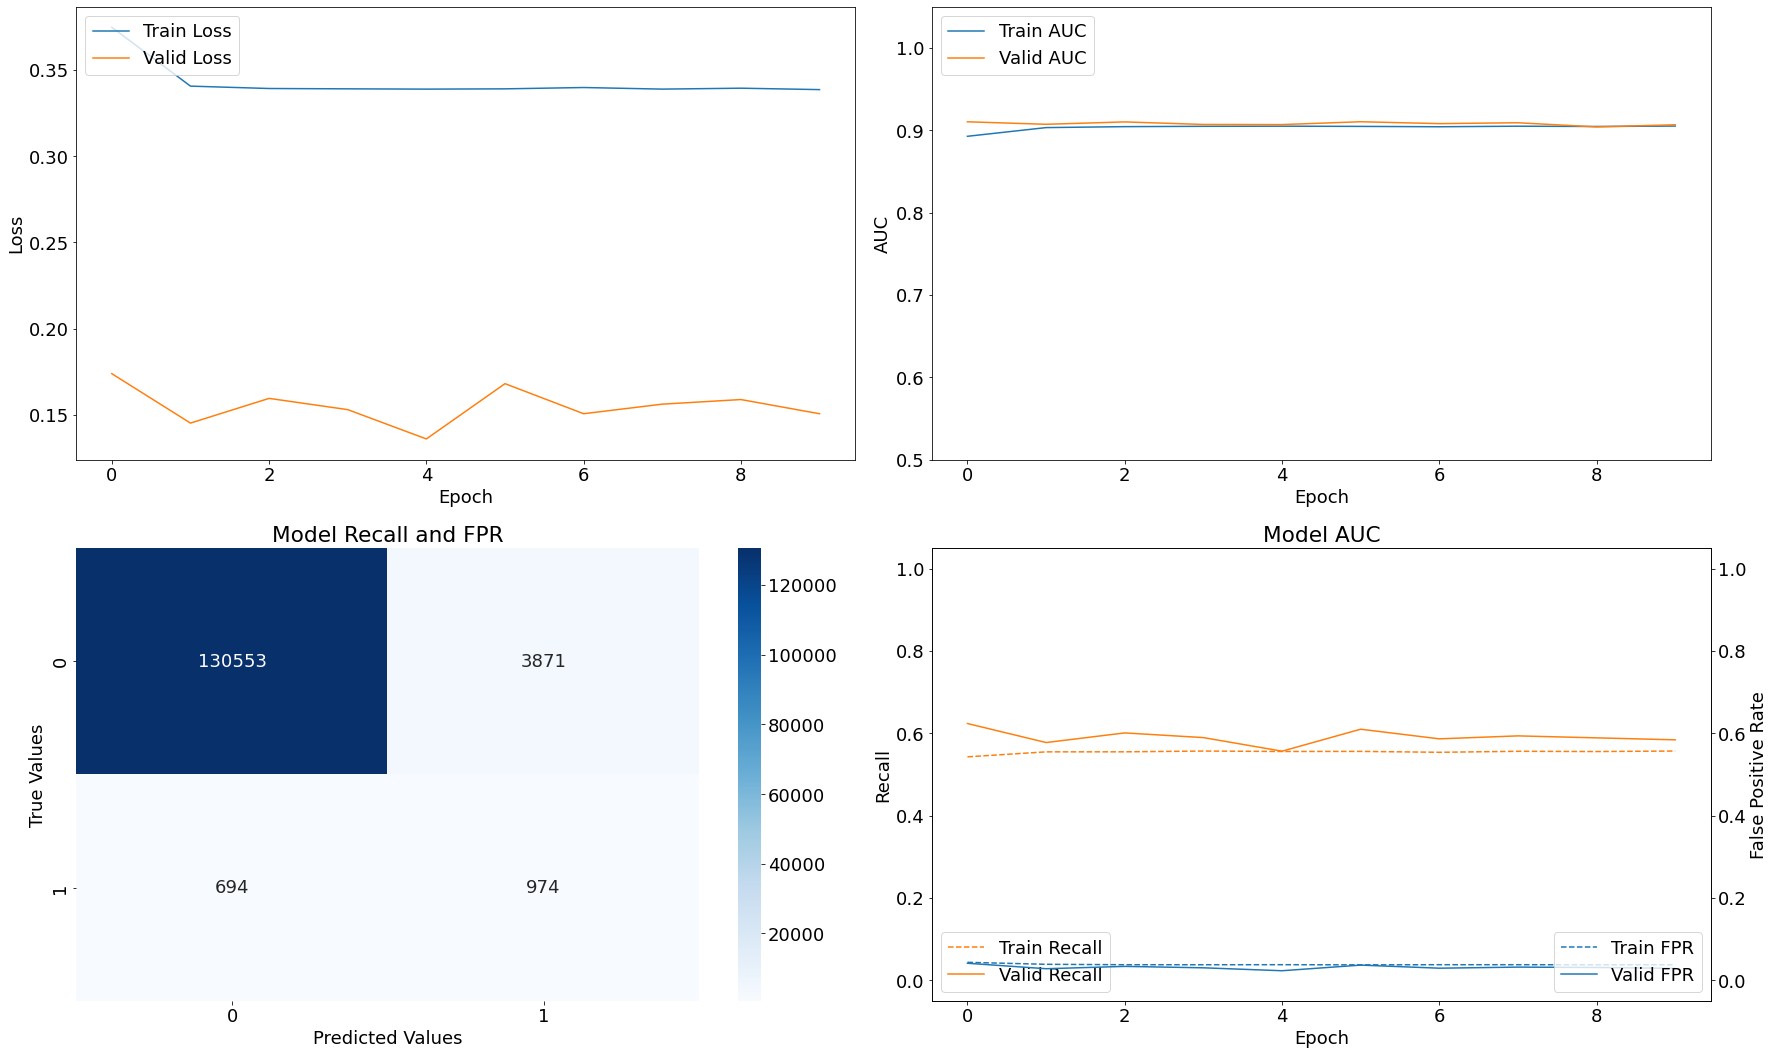

Epoch 00007: early stopping
Results for Variant III Model V7 with threshold = 0.4.

 Train f1: 0.6755048841234857 
 Val f1: 0.2684794024945763 

 Train Recall: 0.6353987455368042 
 Val Recall: 0.6097122430801392 

 Train FPR: 0.0614640973508358 
 Val FPR: 0.03638487309217453


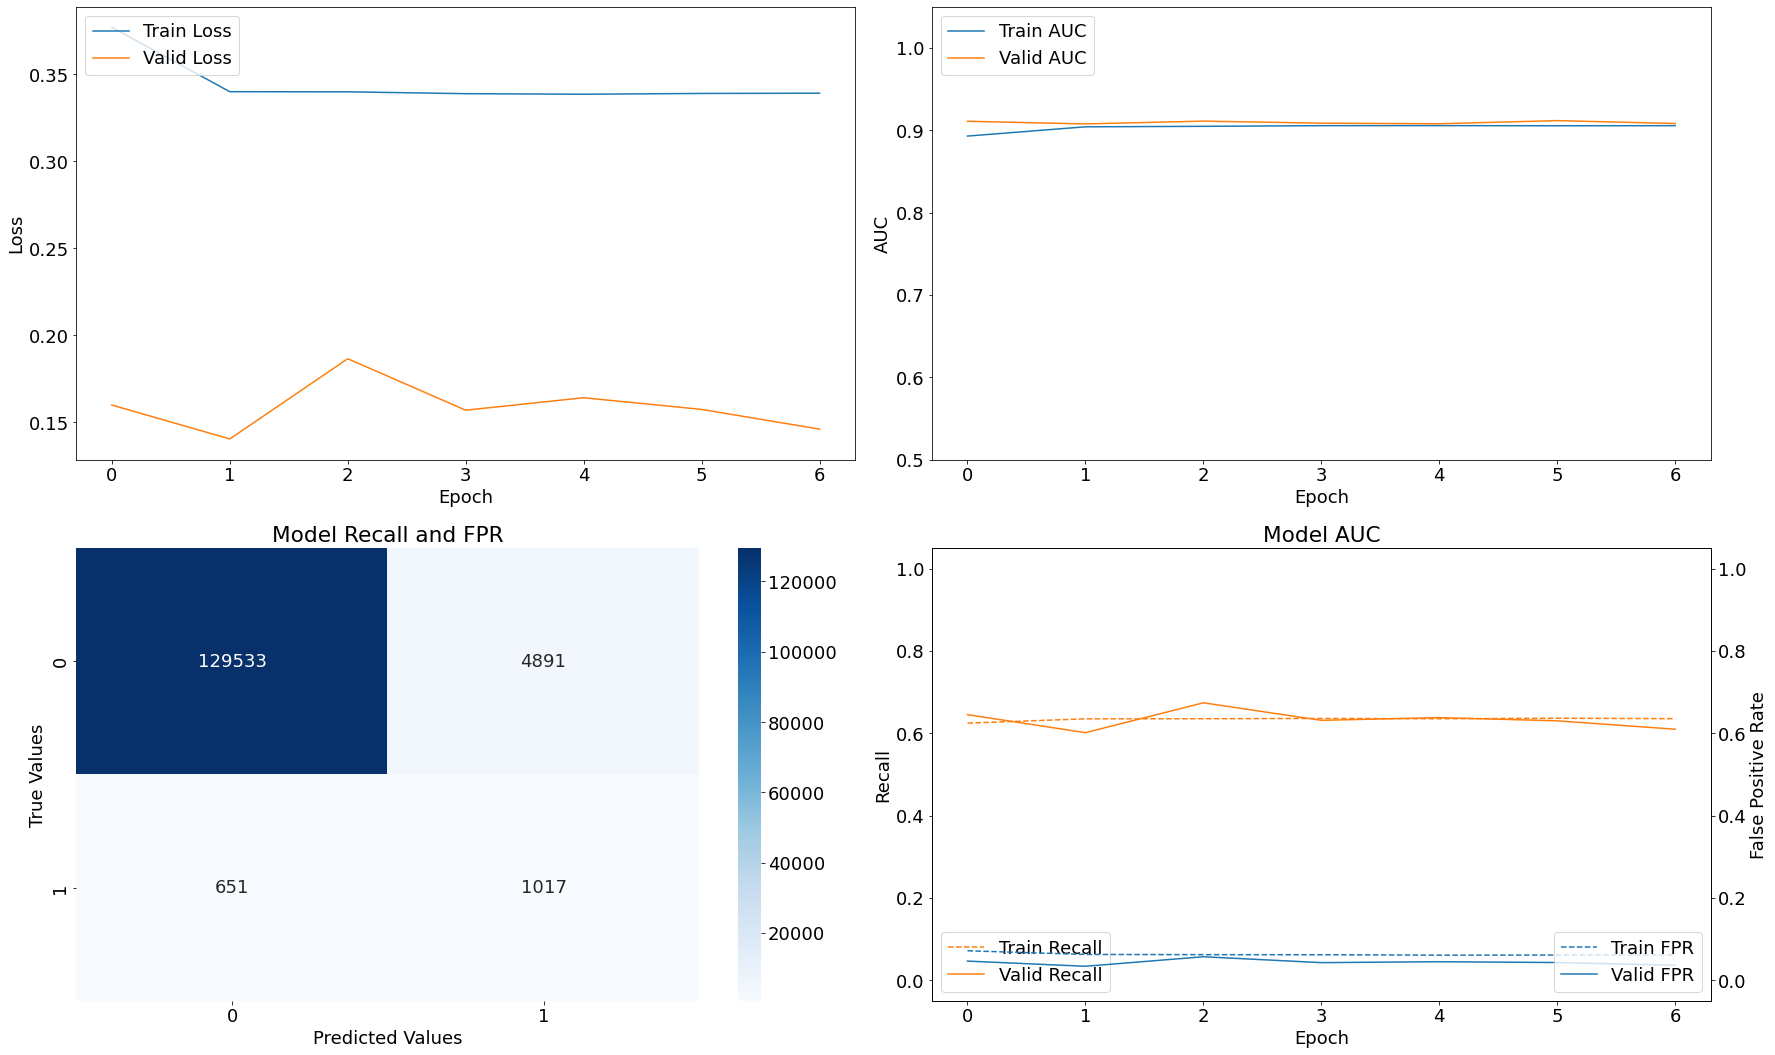

Epoch 00007: early stopping
Results for Variant III Model V7 with threshold = 0.3.

 Train f1: 0.6797281413396333 
 Val f1: 0.19918944723044416 

 Train Recall: 0.7158523201942444 
 Val Recall: 0.6924460530281067 

 Train FPR: 0.09760917723178864 
 Val FPR: 0.06527107954025269


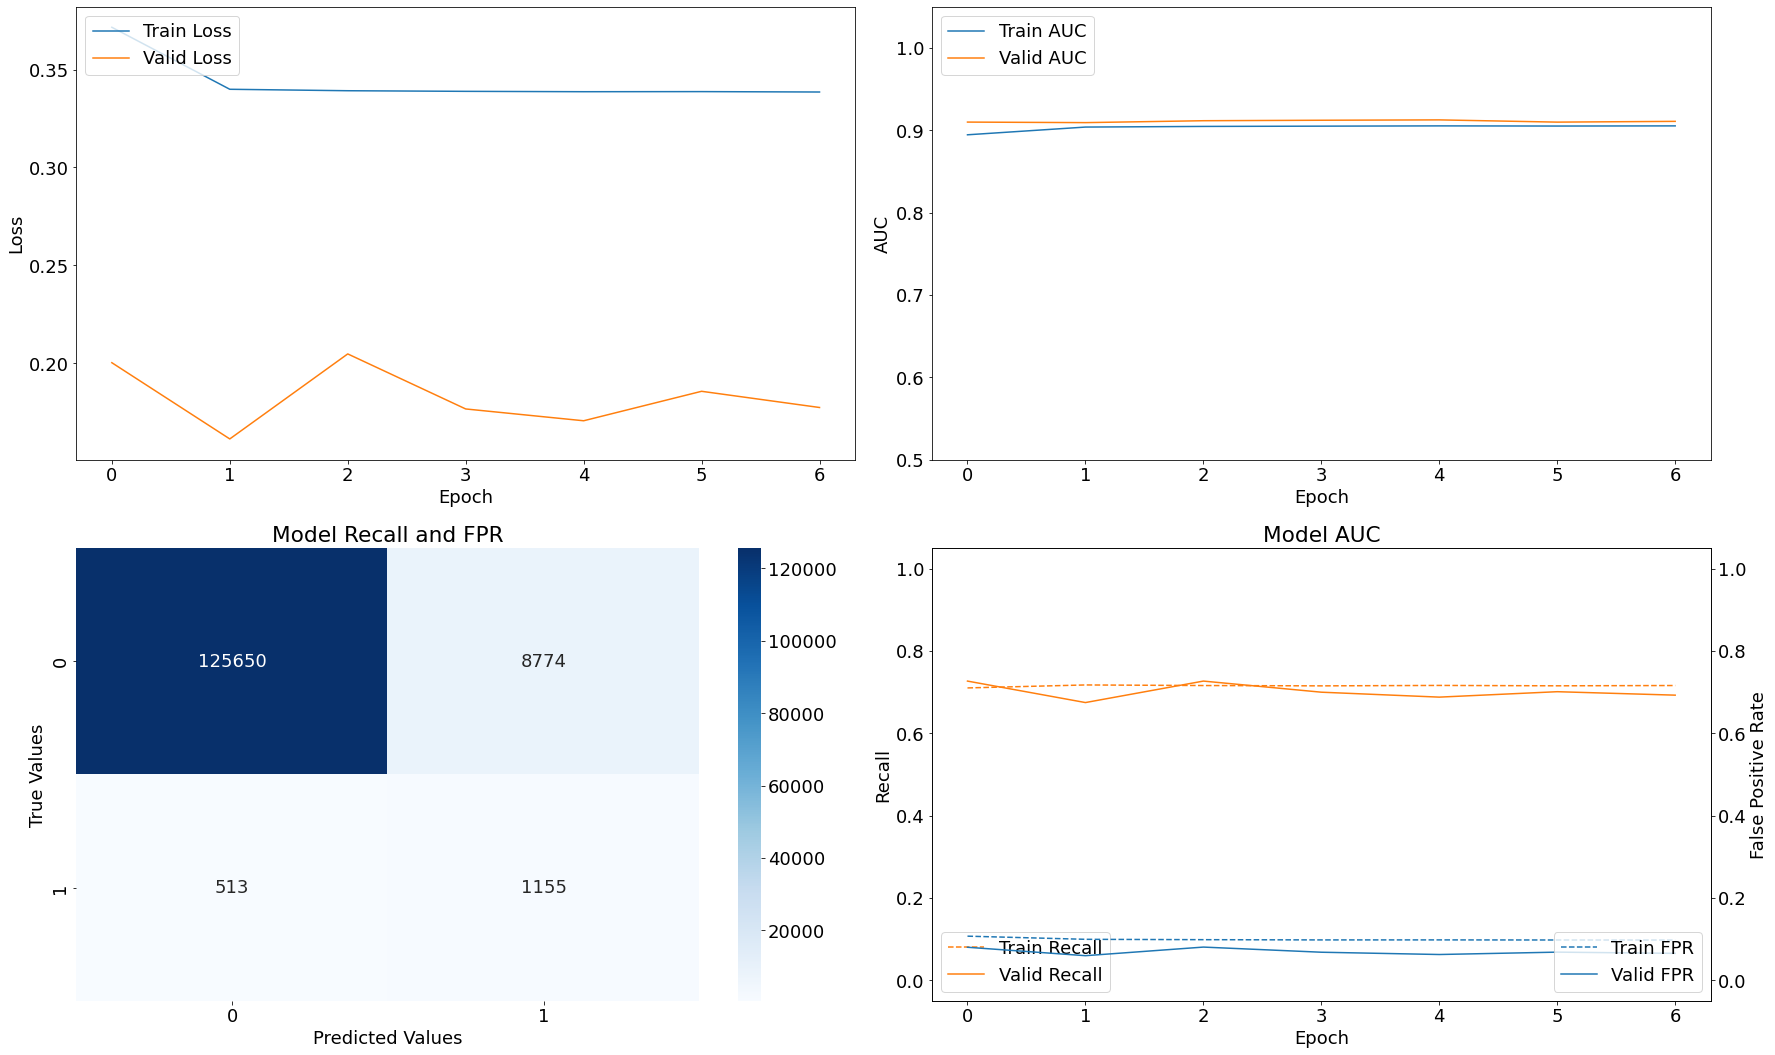

Epoch 00013: early stopping
Results for Variant III Model V7 with threshold = 0.2.

 Train f1: 0.6531406945884304 
 Val f1: 0.21927686937604074 

 Train Recall: 0.815069854259491 
 Val Recall: 0.6744604110717773 

 Train FPR: 0.17019401490688324 
 Val FPR: 0.0555555559694767


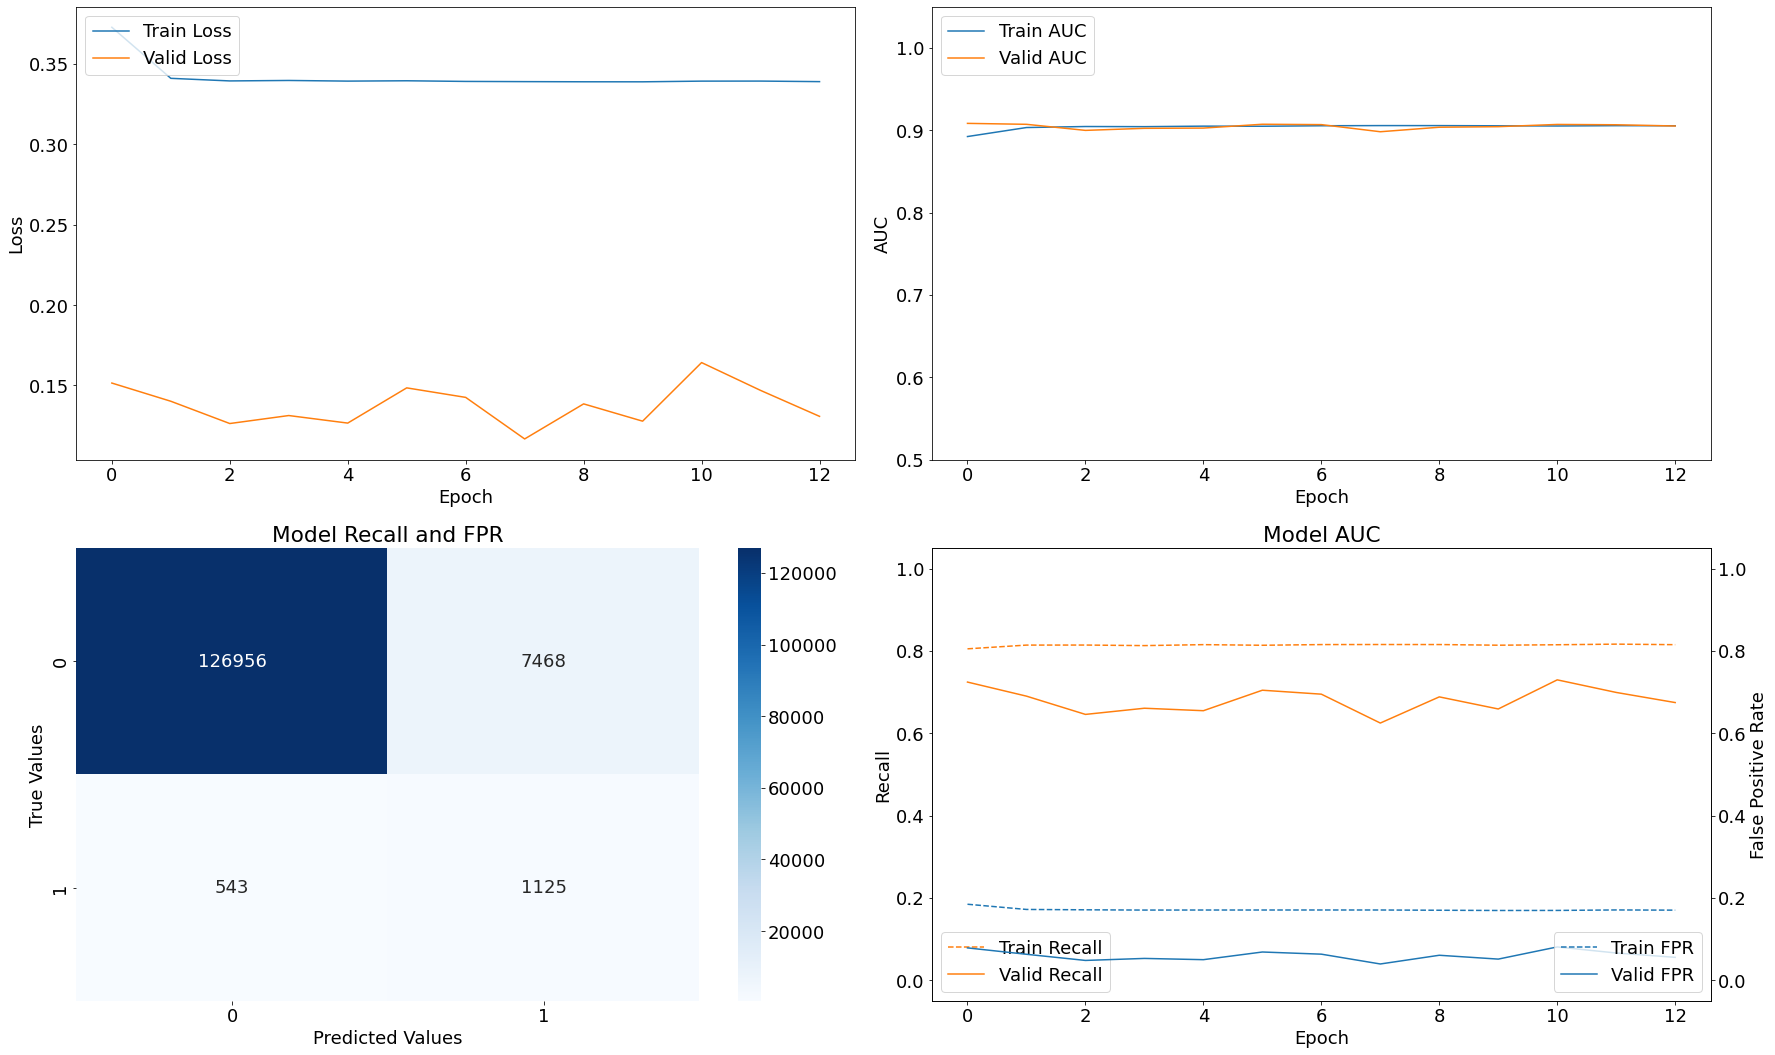

Epoch 00011: early stopping
Results for Variant III Model V7 with threshold = 0.1.

 Train f1: 0.573364558219617 
 Val f1: 0.1621135126318196 

 Train Recall: 0.9112204909324646 
 Val Recall: 0.7559952139854431 

 Train FPR: 0.31681978702545166 
 Val FPR: 0.09394155442714691


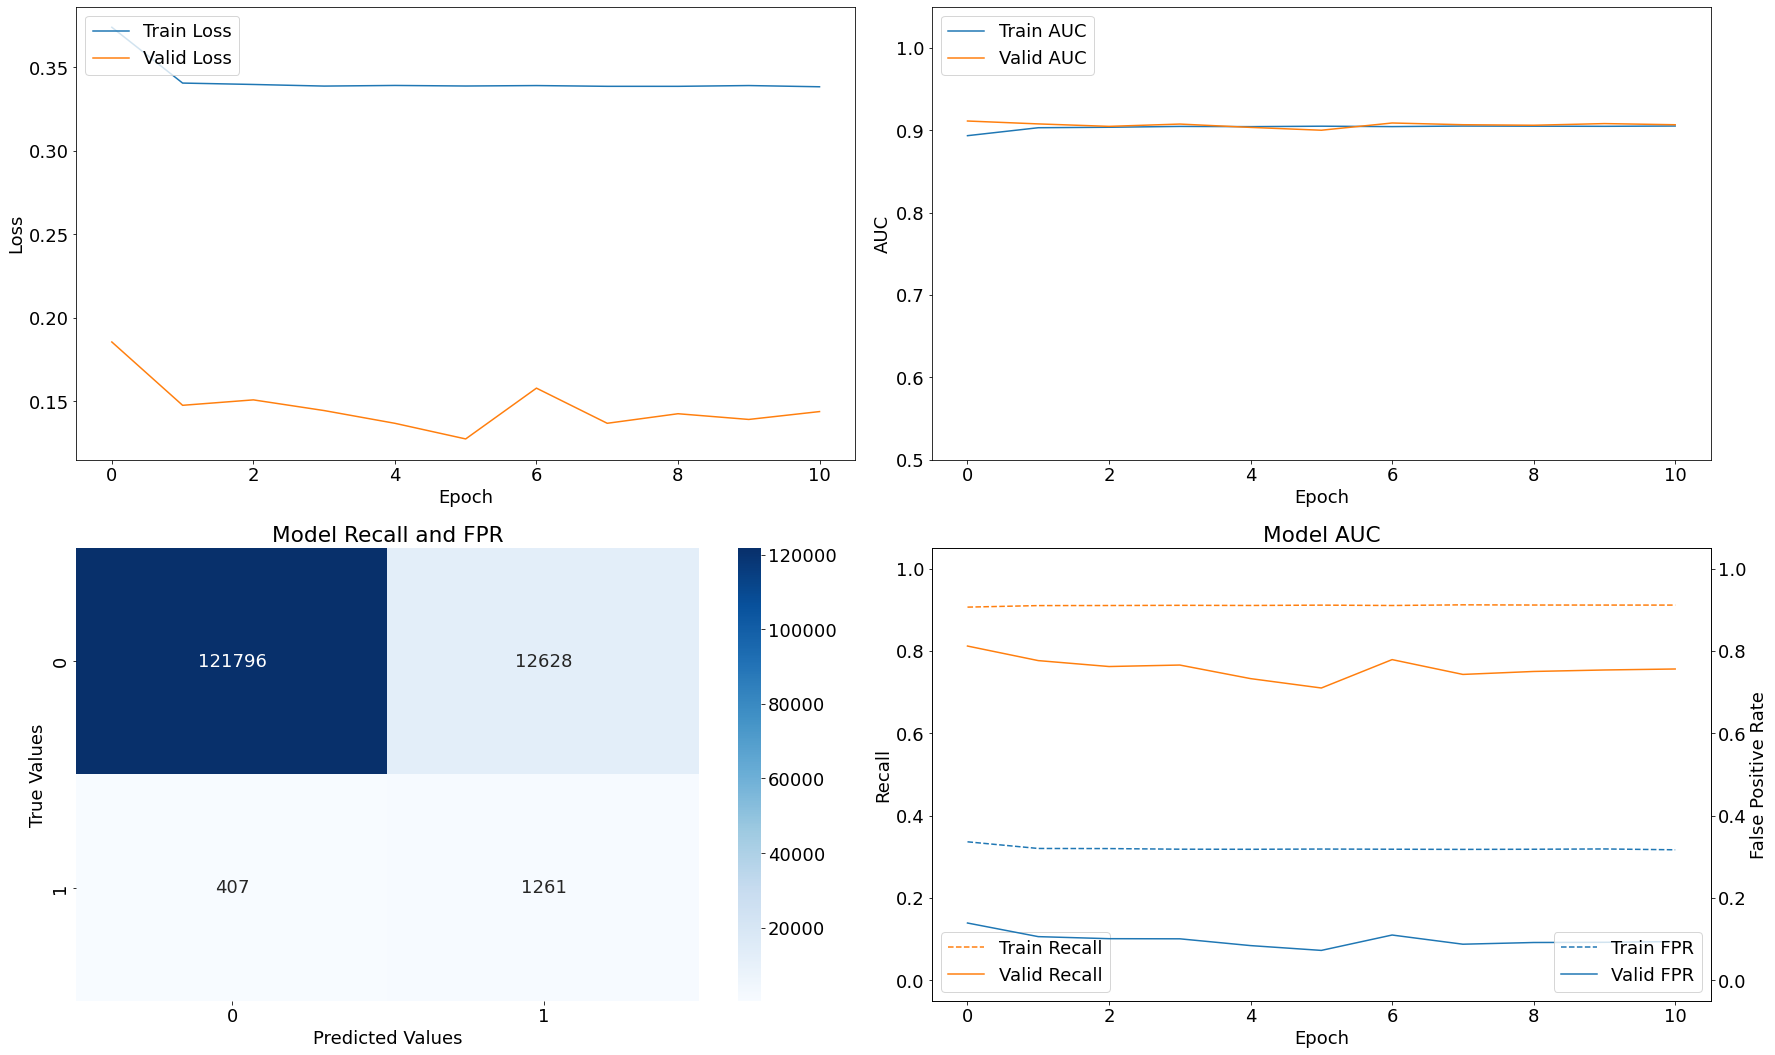

In [21]:
for t in thresholds:
    
    modelling_v7(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V7',
                 threshold=t)

---

### Eighth Model Iteration

In [22]:
def modelling_v8(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):   
    
    model_v8 = models.Sequential()

    model_v8.add(layers.Input(shape=(n_features, )))
    model_v8.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.AlphaDropout(0.25))
    model_v8.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2()))
    model_v8.add(layers.Dense(1, activation='sigmoid'))

    model_v8.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v8_history = model_v8.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs, 
                                    verbose=0).history
    
    evaluate(model_v8,
             name,
             model_v8_history,
             X_val,
             y_val,
             threshold=threshold)

Results for Variant III Model V8 with threshold = 0.5.

 Train f1: 0.638224532045954 
 Val f1: 0.14792148228672833 

 Train Recall: 0.5560172200202942 
 Val Recall: 0.7679855823516846 

 Train FPR: 0.04659244045615196 
 Val FPR: 0.10690799355506897


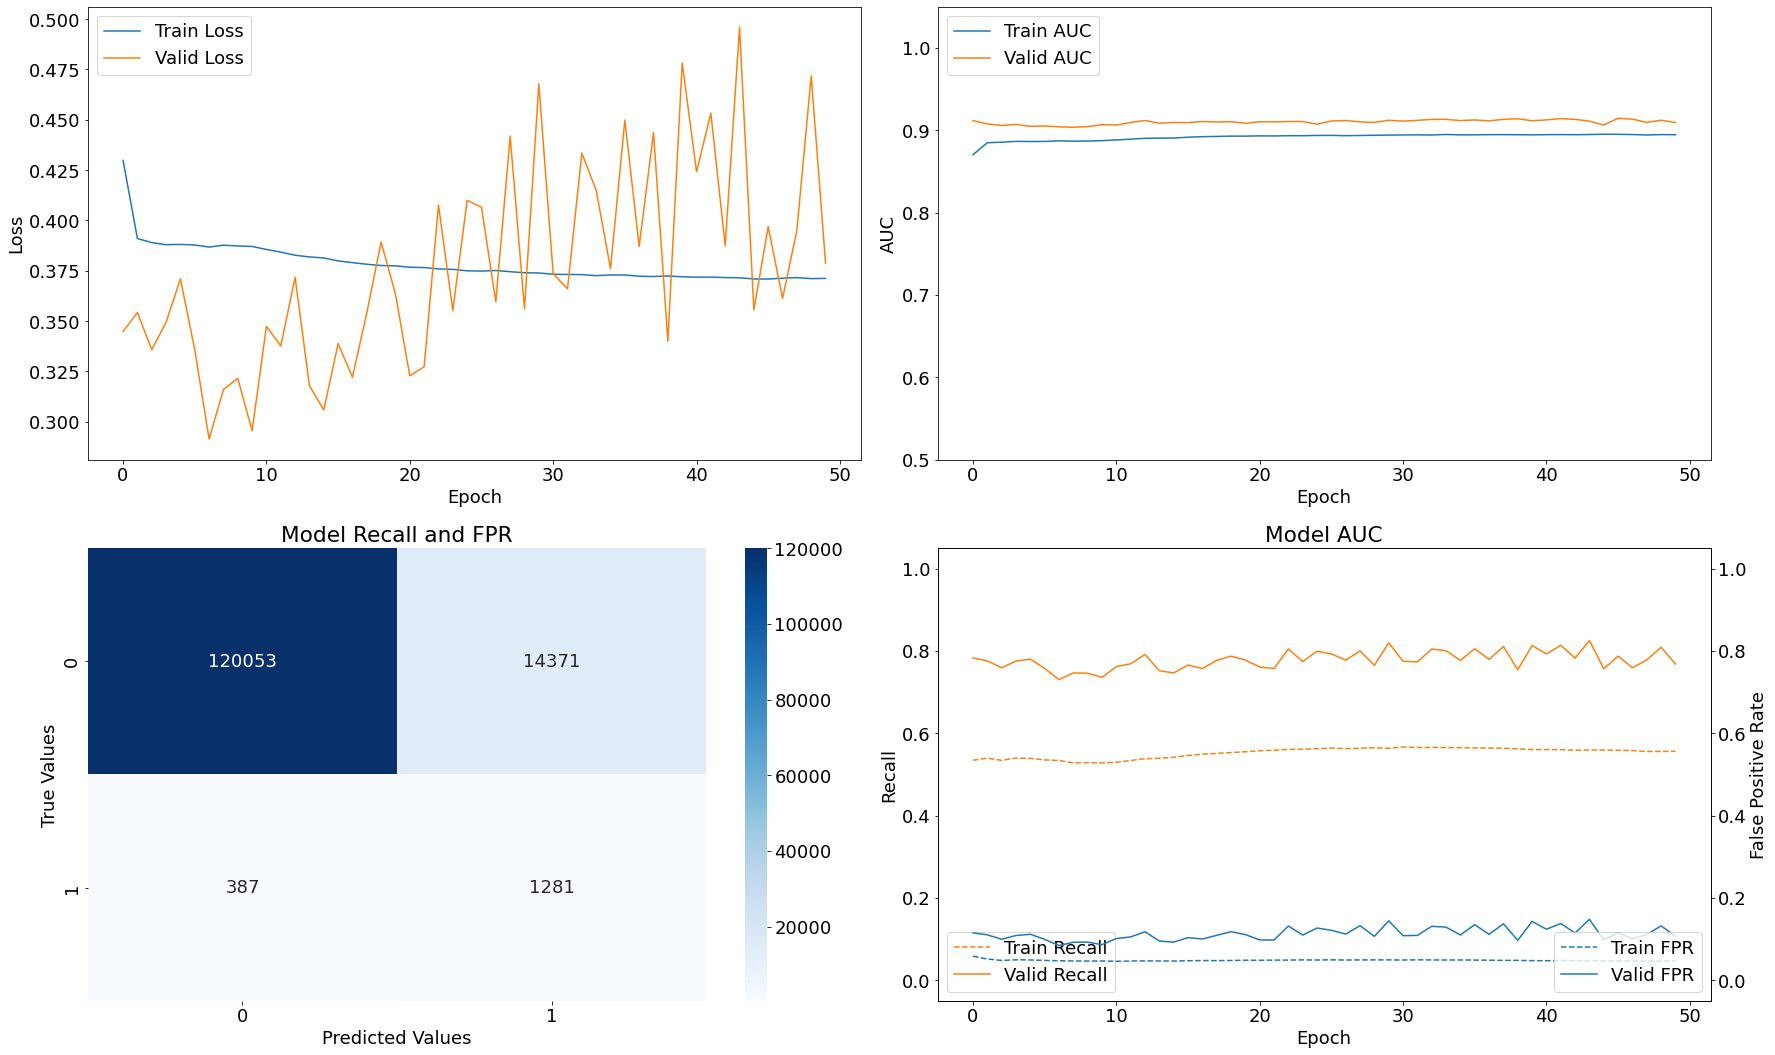

Results for Variant III Model V8 with threshold = 0.4.

 Train f1: 0.6518851673192829 
 Val f1: 0.20406681093603474 

 Train Recall: 0.615658700466156 
 Val Recall: 0.6738609075546265 

 Train FPR: 0.06829921901226044 
 Val FPR: 0.06117955222725868


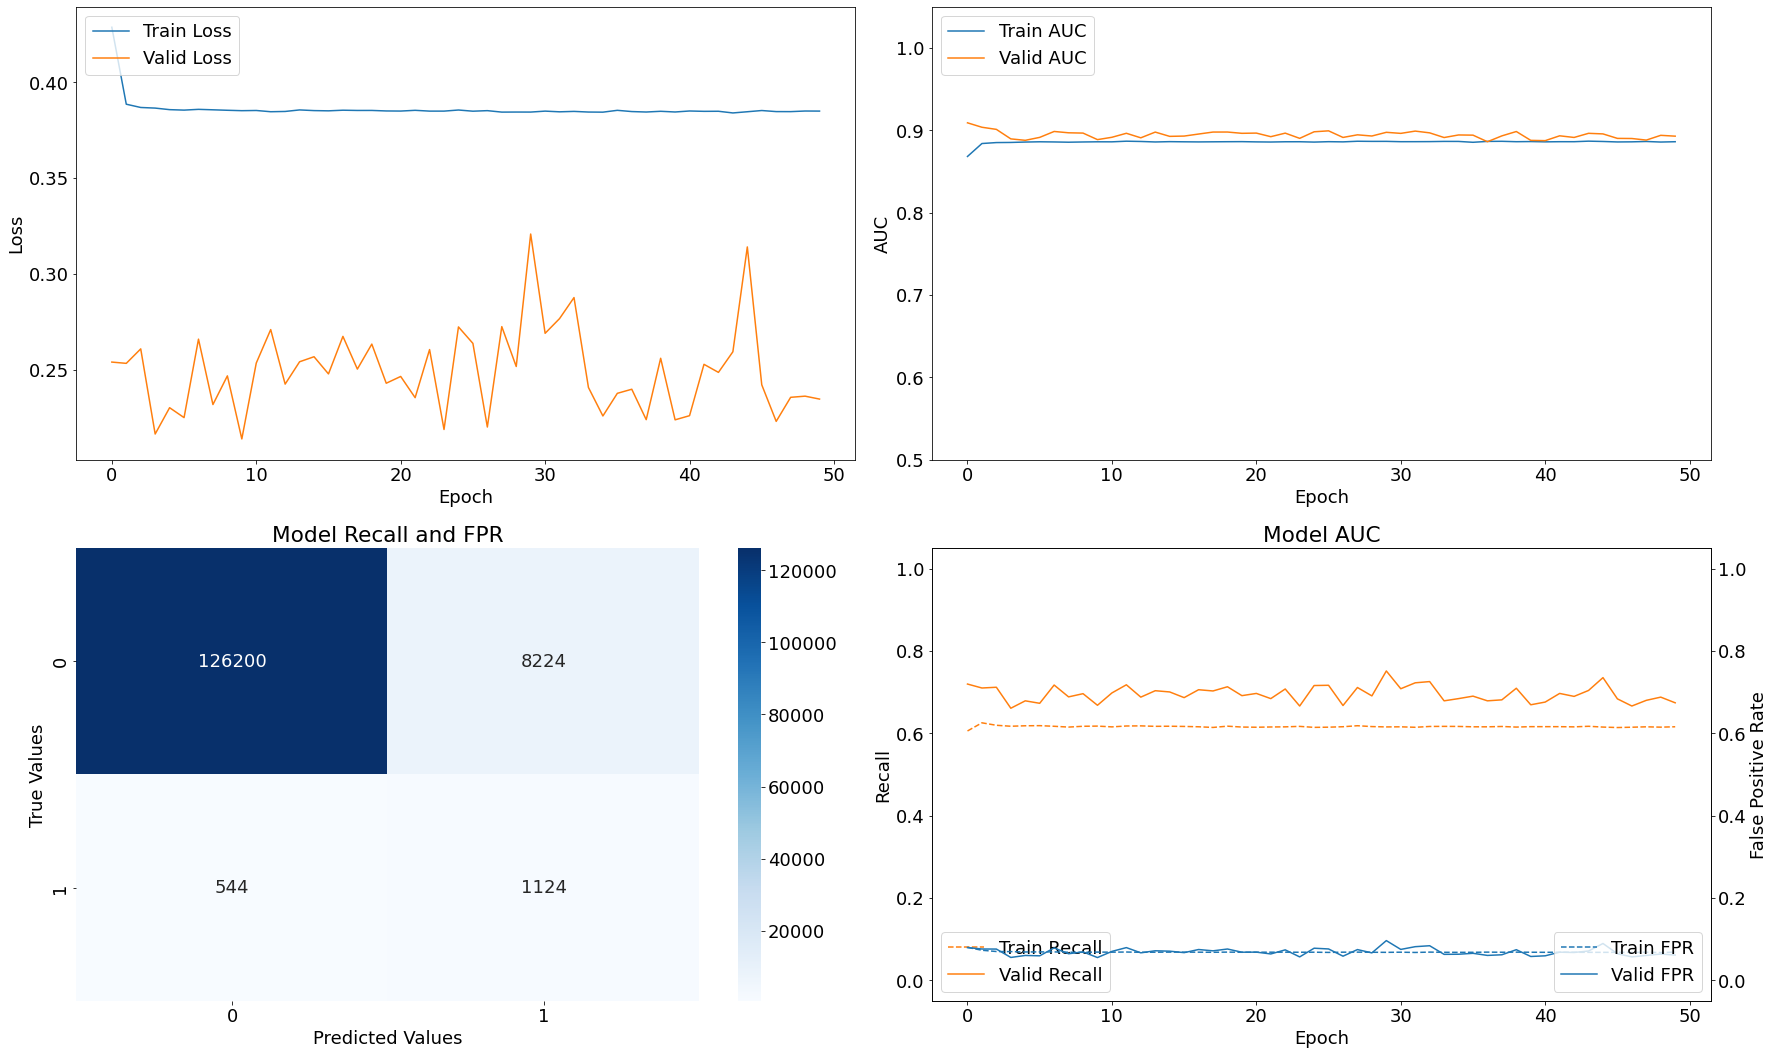

Results for Variant III Model V8 with threshold = 0.3.

 Train f1: 0.6551387631150241 
 Val f1: 0.19672408015067813 

 Train Recall: 0.6997978687286377 
 Val Recall: 0.6984412670135498 

 Train FPR: 0.10913394391536713 
 Val FPR: 0.06703416258096695


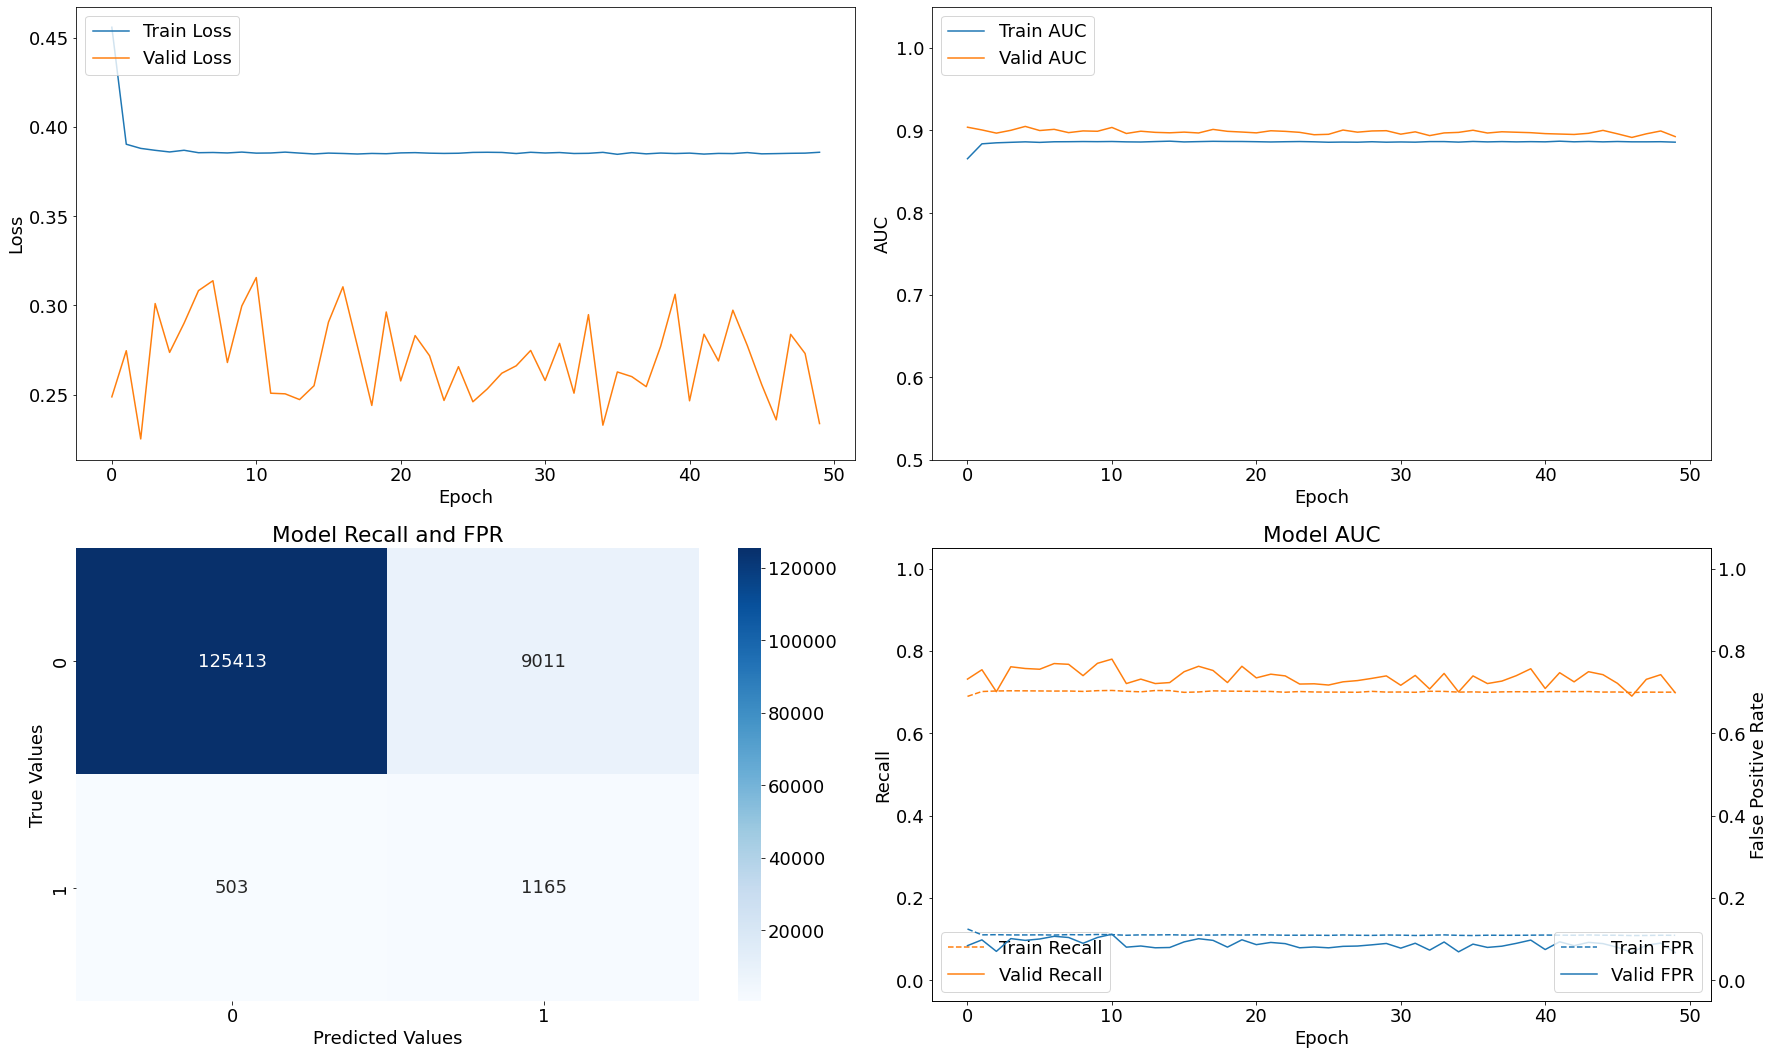

Results for Variant III Model V8 with threshold = 0.2.

 Train f1: 0.6382728355463754 
 Val f1: 0.20304748322830654 

 Train Recall: 0.7782566547393799 
 Val Recall: 0.6870503425598145 

 Train FPR: 0.16509367525577545 
 Val FPR: 0.06303934007883072


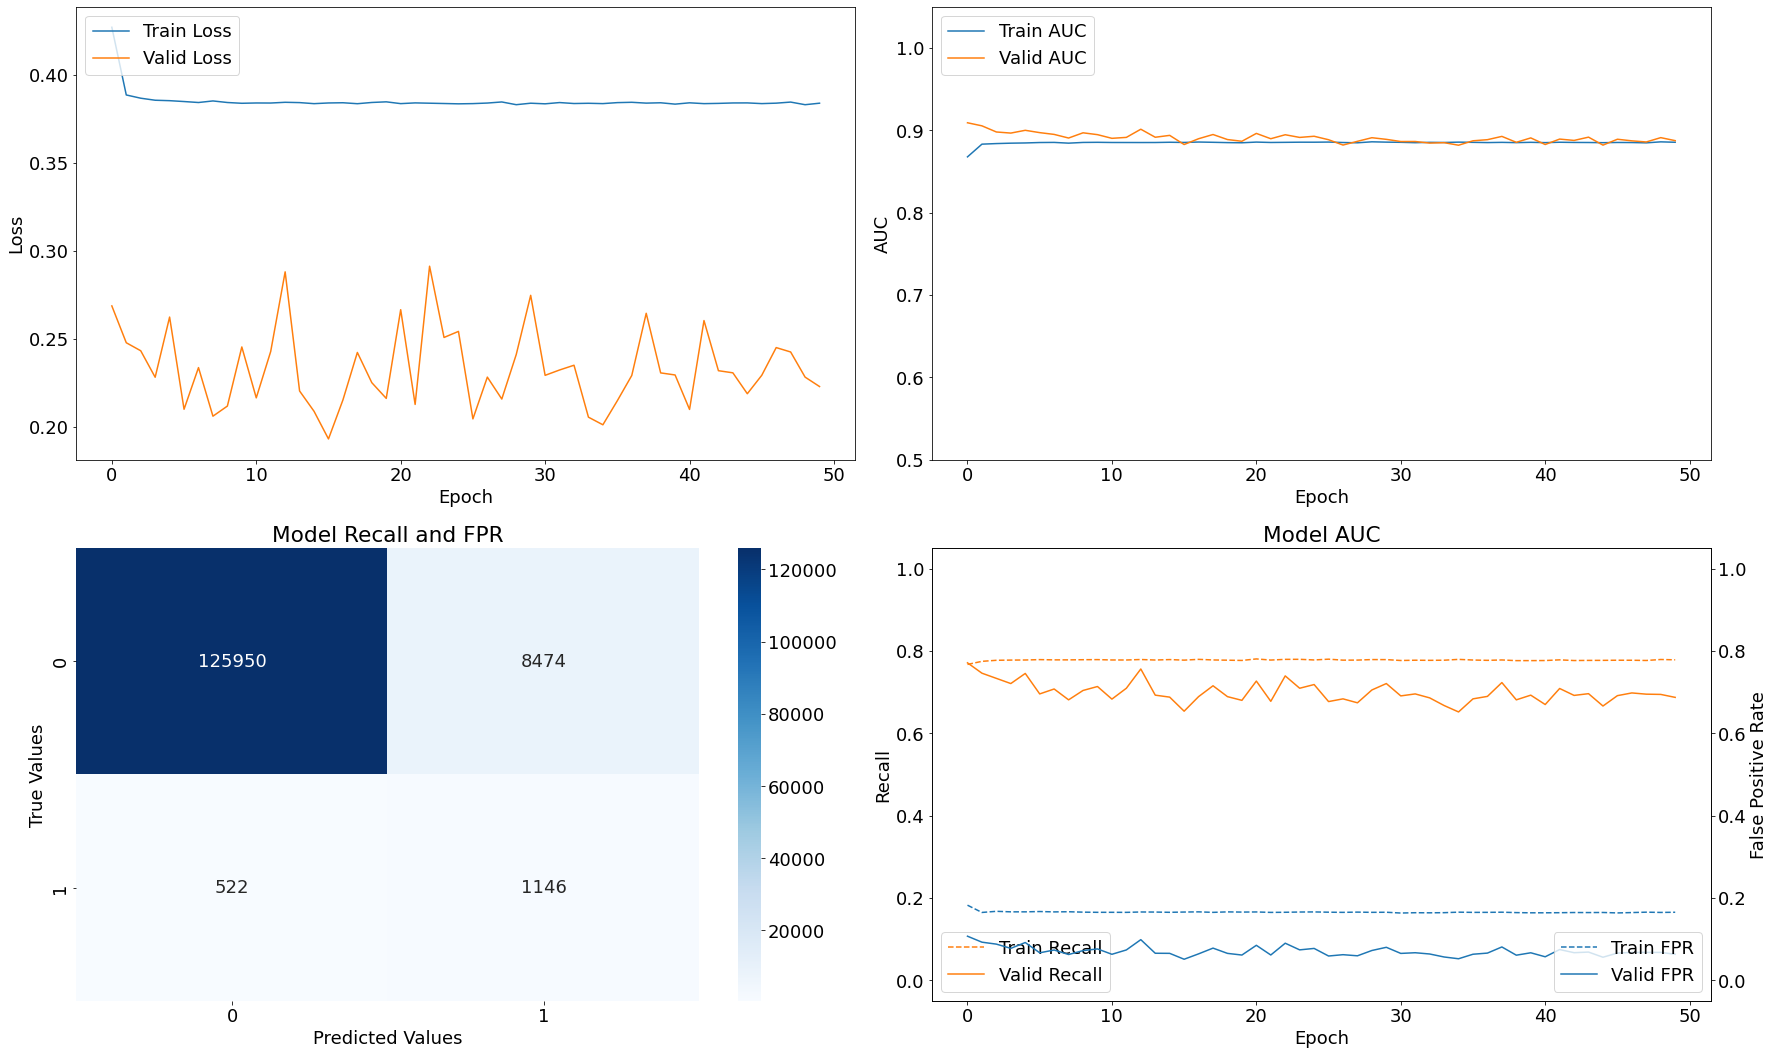

Results for Variant III Model V8 with threshold = 0.1.

 Train f1: 0.5455789358745471 
 Val f1: 0.14512421232367123 

 Train Recall: 0.8975395560264587 
 Val Recall: 0.7757793664932251 

 Train FPR: 0.348171204328537 
 Val FPR: 0.11062756925821304


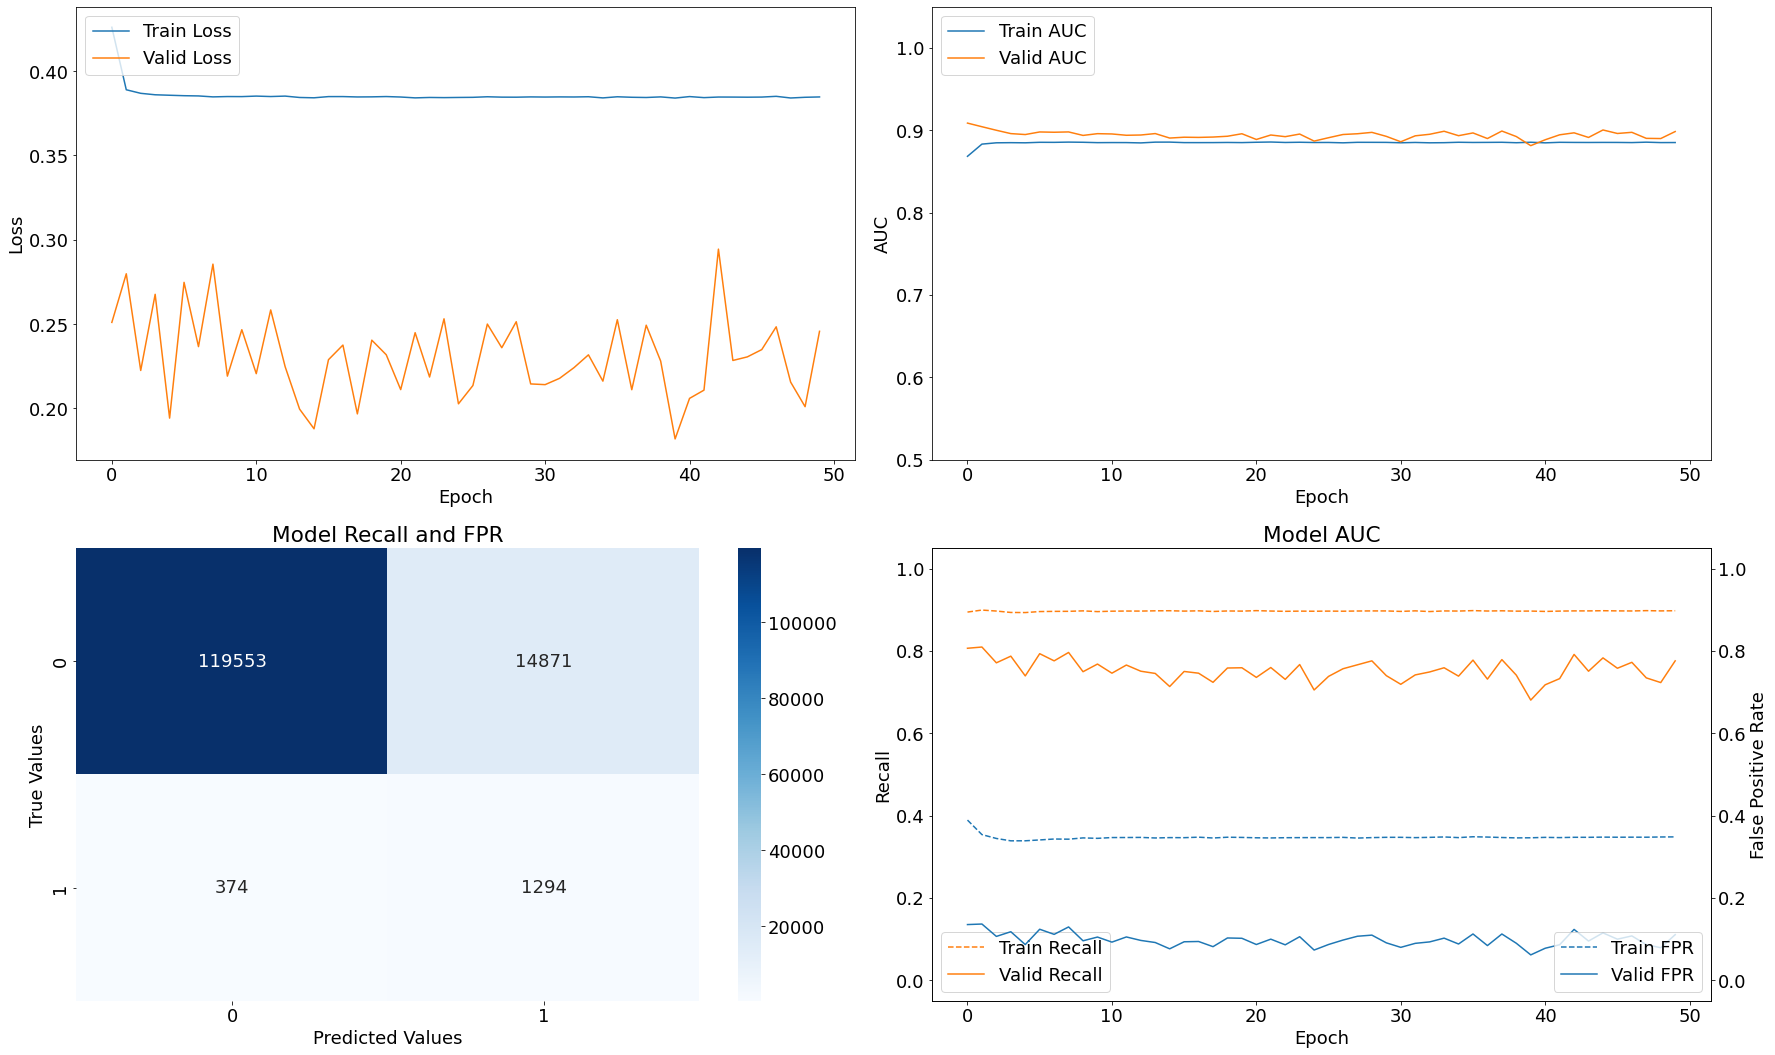

In [23]:
for t in thresholds:
    
    modelling_v8(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V8',
                 threshold=t)

---

### Ninth Model Iteration

In [24]:
def modelling_v9(X_train, y_train, X_val, y_val, name, epochs=50, batch_size=256, threshold=0.5):

    model_v9 = models.Sequential()

    model_v9.add(layers.Input(shape=(n_features, )))
    model_v9.add(layers.Dense(32,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(16,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(8,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.AlphaDropout(0.25))
    model_v9.add(layers.Dense(4,
                              kernel_initializer='lecun_normal',
                              activation='selu',
                              kernel_regularizer=regularizers.L2(l2=0.005)))
    model_v9.add(layers.Dense(1, activation='sigmoid'))

    model_v9.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['AUC',
                              tf.keras.metrics.Precision(thresholds=threshold),
                              tf.keras.metrics.Recall(thresholds=threshold),
                              FalsePositiveRate(threshold=threshold)])

    model_v9_history = model_v9.fit(X_train,
                                    y_train,
                                    batch_size=batch_size,
                                    validation_data=(X_val, y_val),
                                    class_weight=class_weight,
                                    epochs=epochs,
                                    callbacks=[early_stop],
                                    verbose=0).history
    
    evaluate(model_v9,
             name,
             model_v9_history,
             X_val,
             y_val,
             threshold=threshold)

Epoch 00024: early stopping
Results for Variant III Model V9 with threshold = 0.5.

 Train f1: 0.664152433152558 
 Val f1: 0.27978141556781505 

 Train Recall: 0.5748451948165894 
 Val Recall: 0.6139088869094849 

 Train FPR: 0.03905460238456726 
 Val FPR: 0.03442837670445442


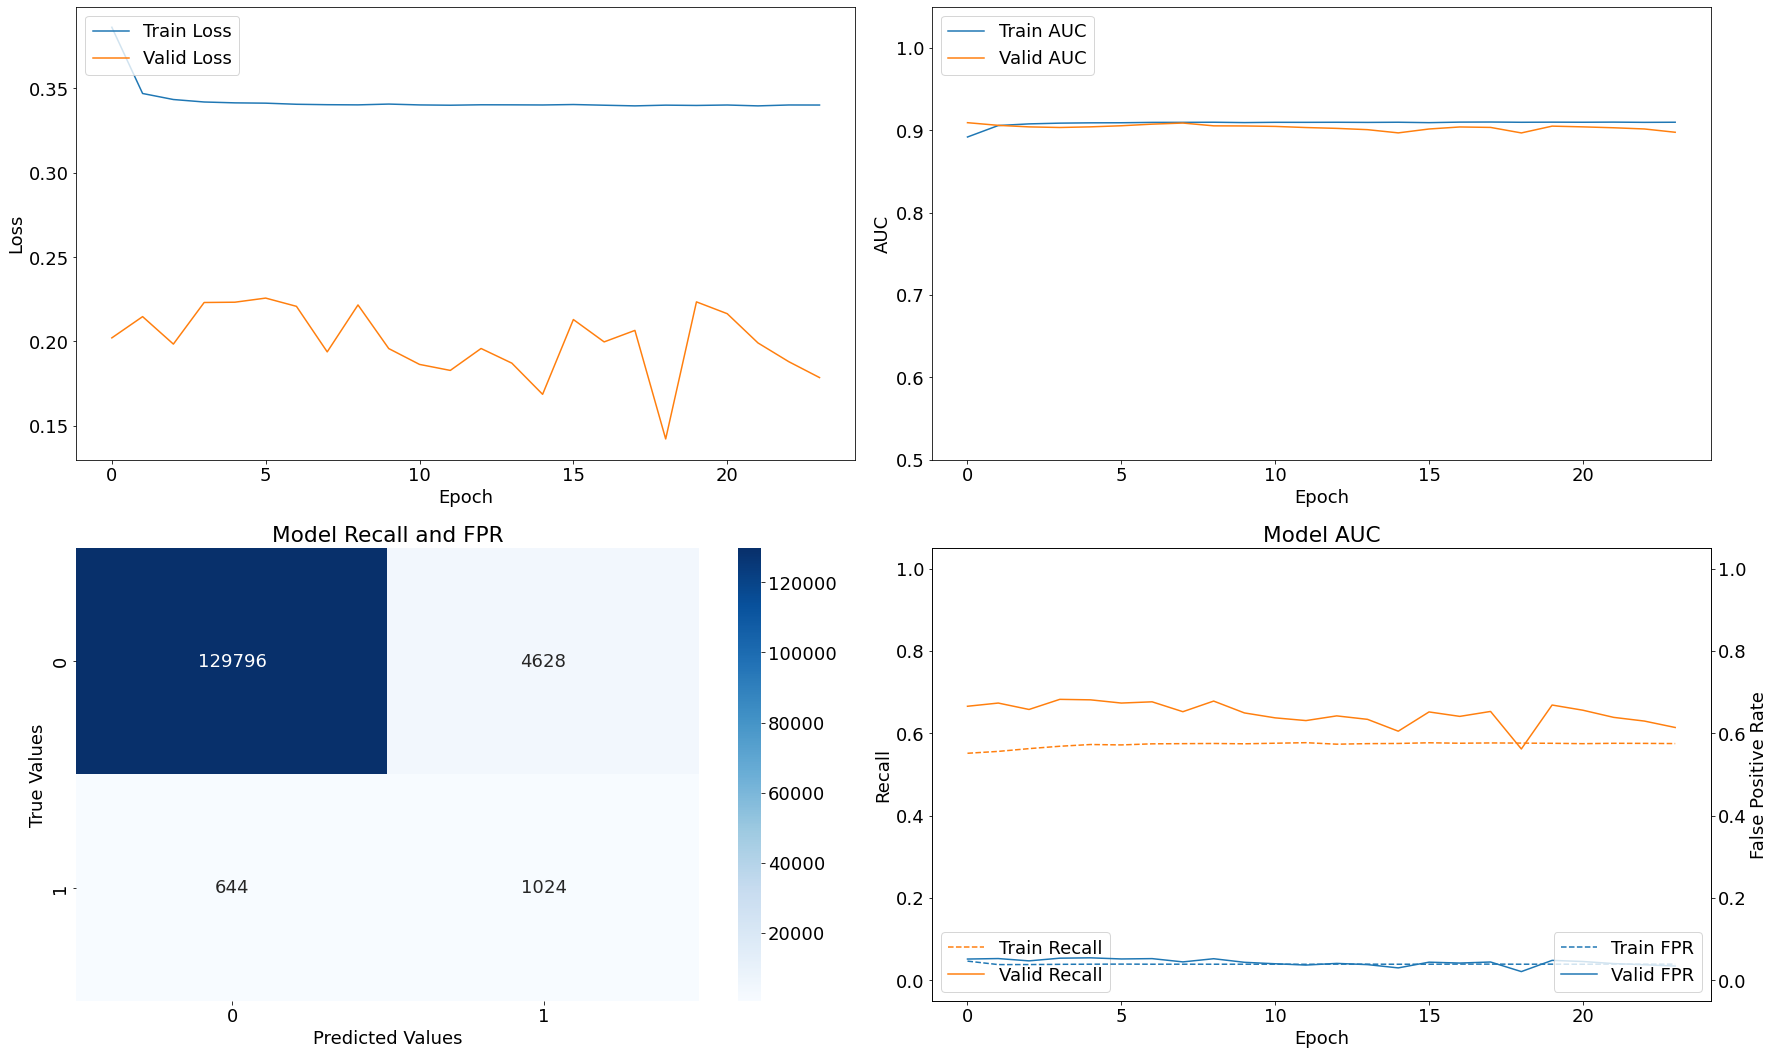

Epoch 00024: early stopping
Results for Variant III Model V9 with threshold = 0.4.

 Train f1: 0.6996841022573923 
 Val f1: 0.35497667704854835 

 Train Recall: 0.6757588386535645 
 Val Recall: 0.5473620891571045 

 Train FPR: 0.06396292895078659 
 Val FPR: 0.01906653493642807


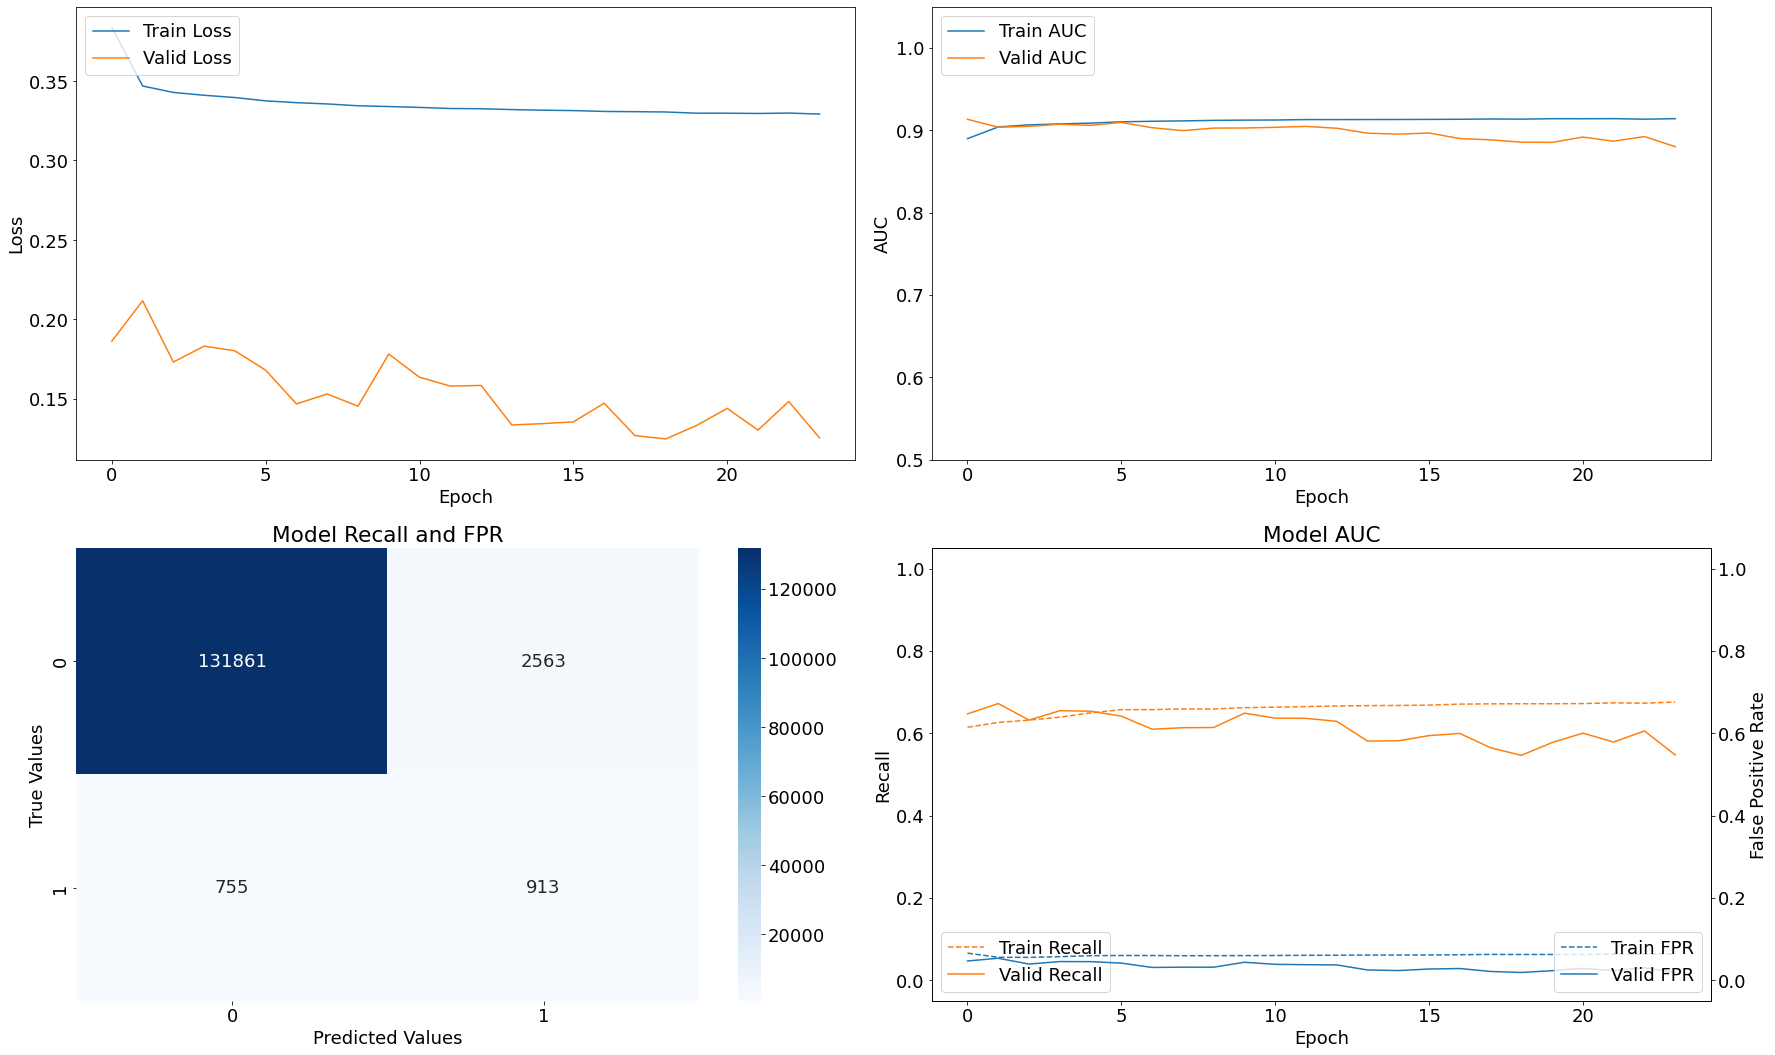

Epoch 00017: early stopping
Results for Variant III Model V9 with threshold = 0.3.

 Train f1: 0.6929241248180933 
 Val f1: 0.20350758454000475 

 Train Recall: 0.747358500957489 
 Val Recall: 0.7200239896774292 

 Train FPR: 0.10243882983922958 
 Val FPR: 0.06646134704351425


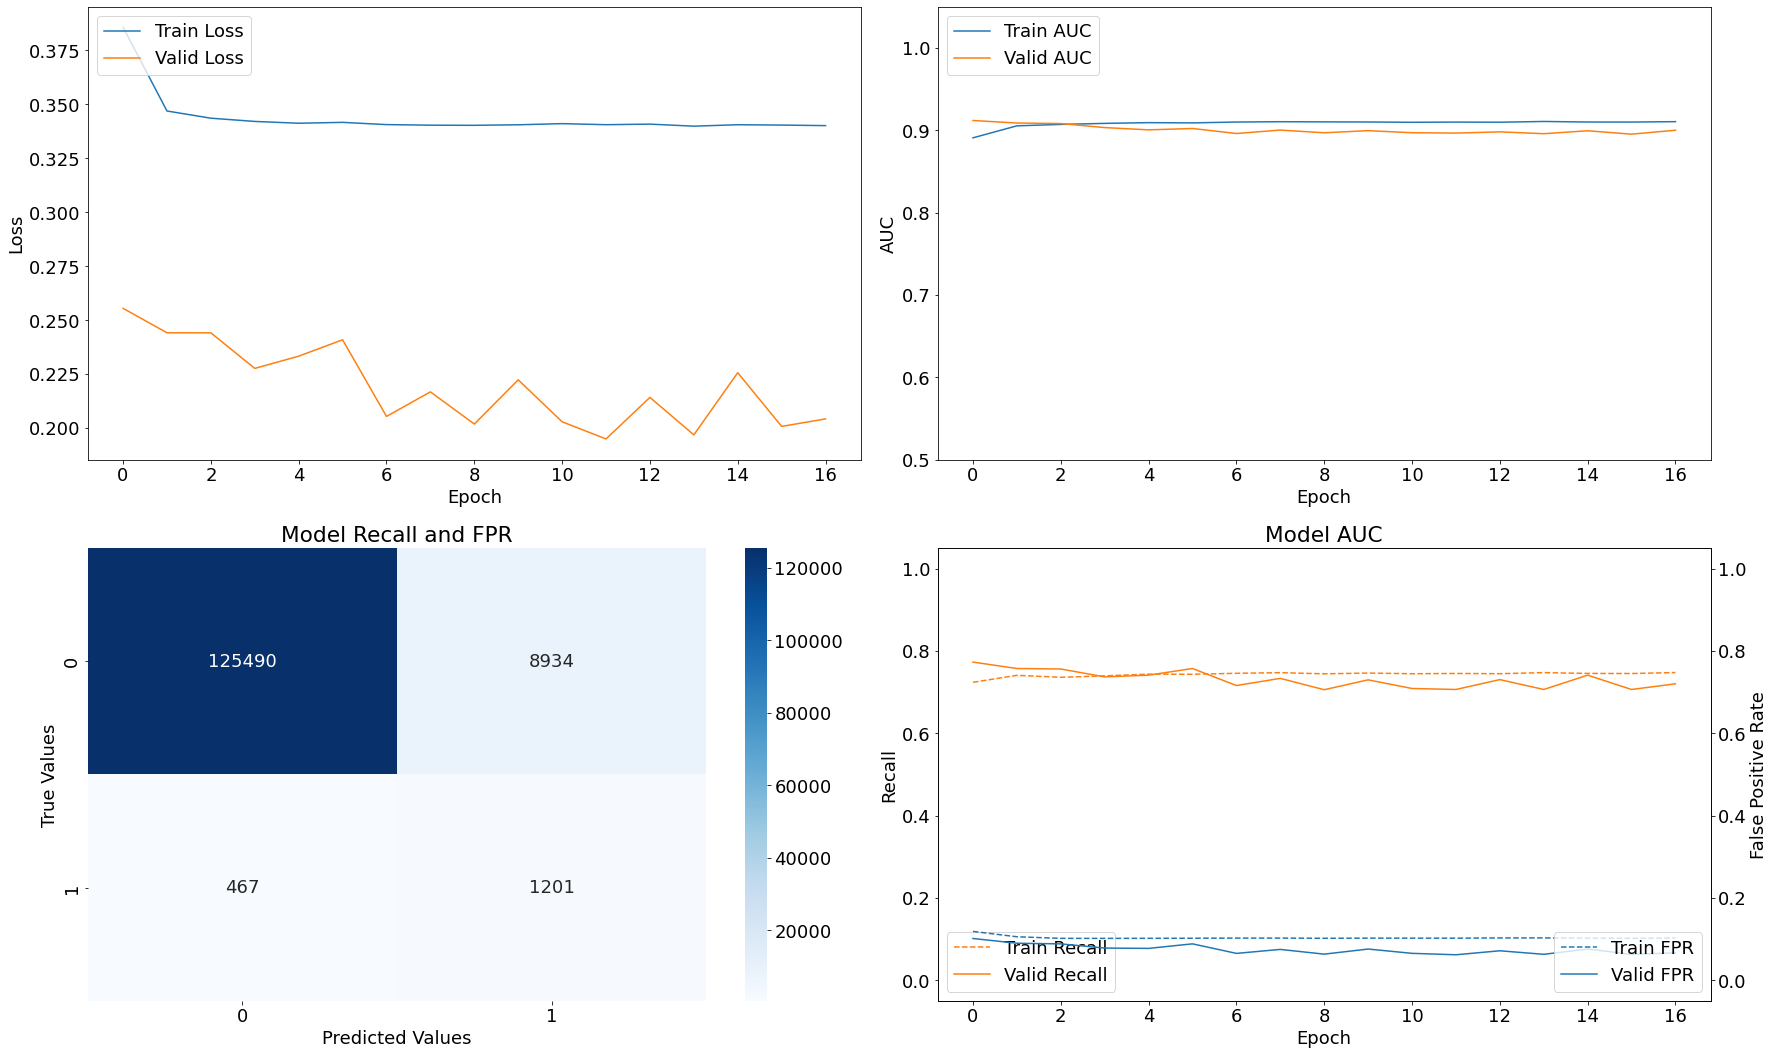

Epoch 00014: early stopping
Results for Variant III Model V9 with threshold = 0.2.

 Train f1: 0.6716138827431725 
 Val f1: 0.2393543577378021 

 Train Recall: 0.8172460198402405 
 Val Recall: 0.6756594777107239 

 Train FPR: 0.15410760045051575 
 Val FPR: 0.04926203563809395


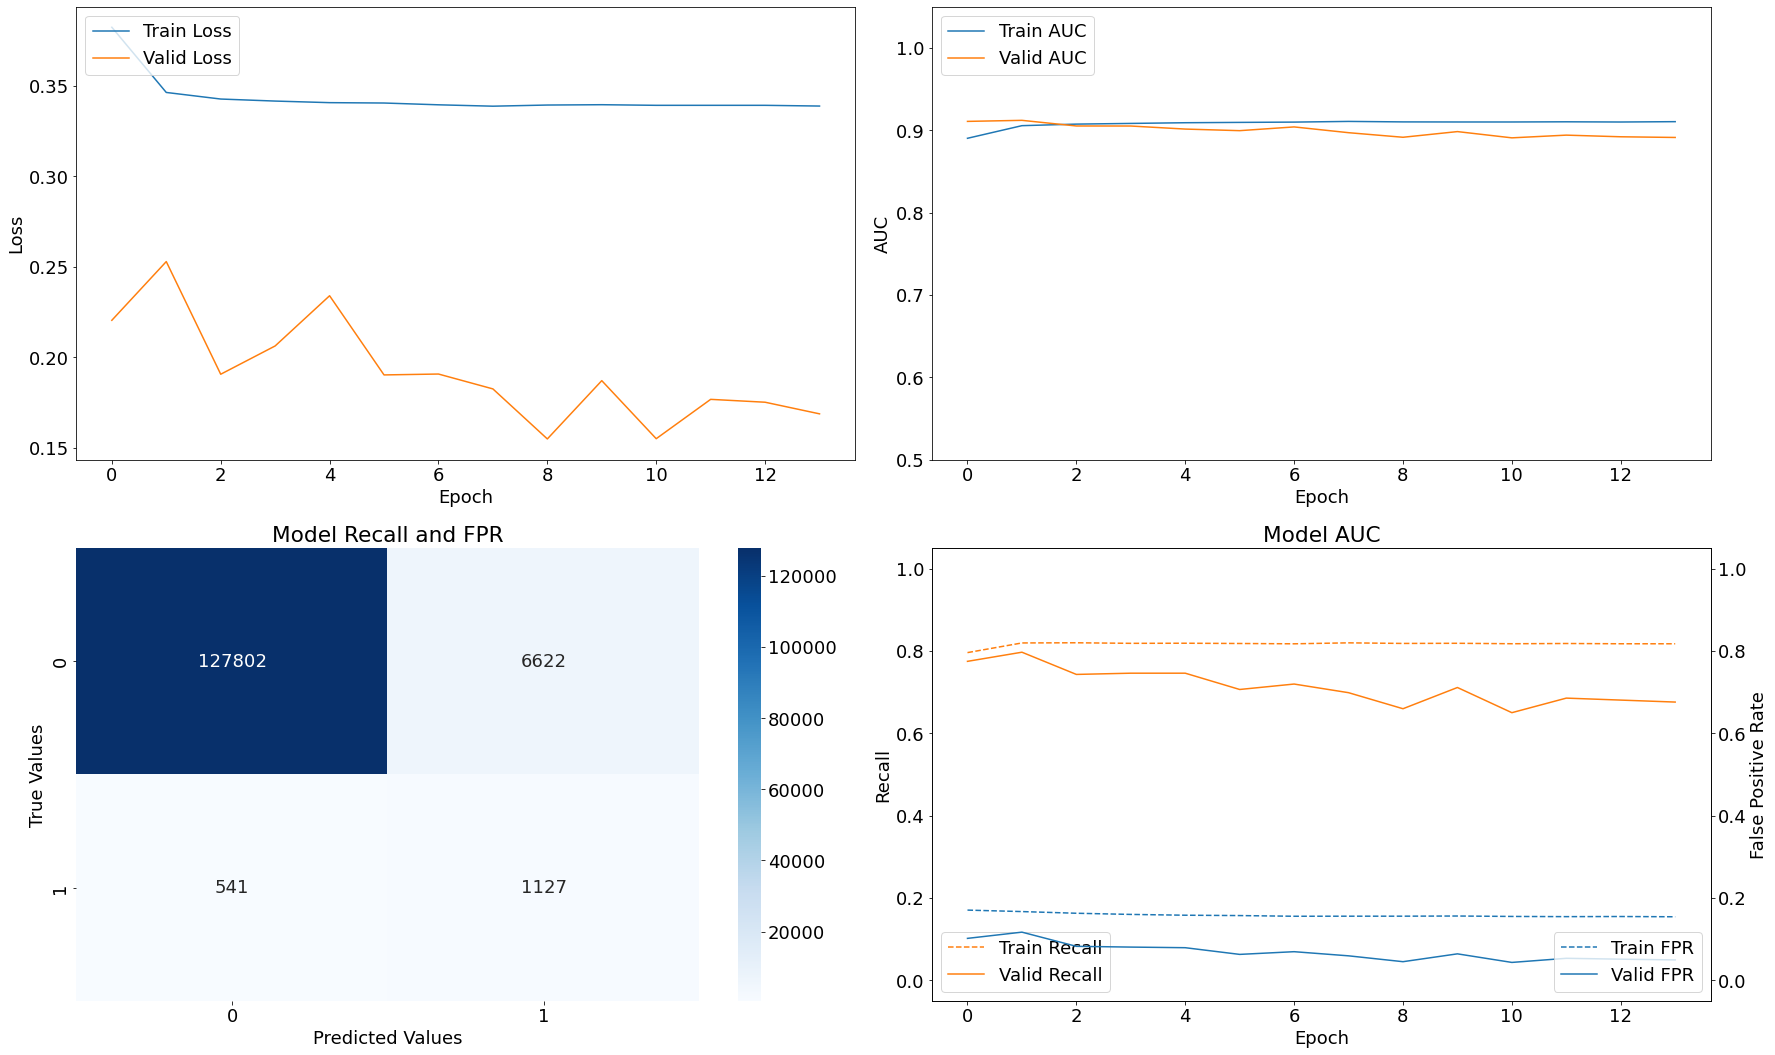

Epoch 00006: early stopping
Results for Variant III Model V9 with threshold = 0.1.

 Train f1: 0.5893498512876909 
 Val f1: 0.13893777882886021 

 Train Recall: 0.9159461855888367 
 Val Recall: 0.8045563697814941 

 Train FPR: 0.2980945408344269 
 Val FPR: 0.12131762504577637


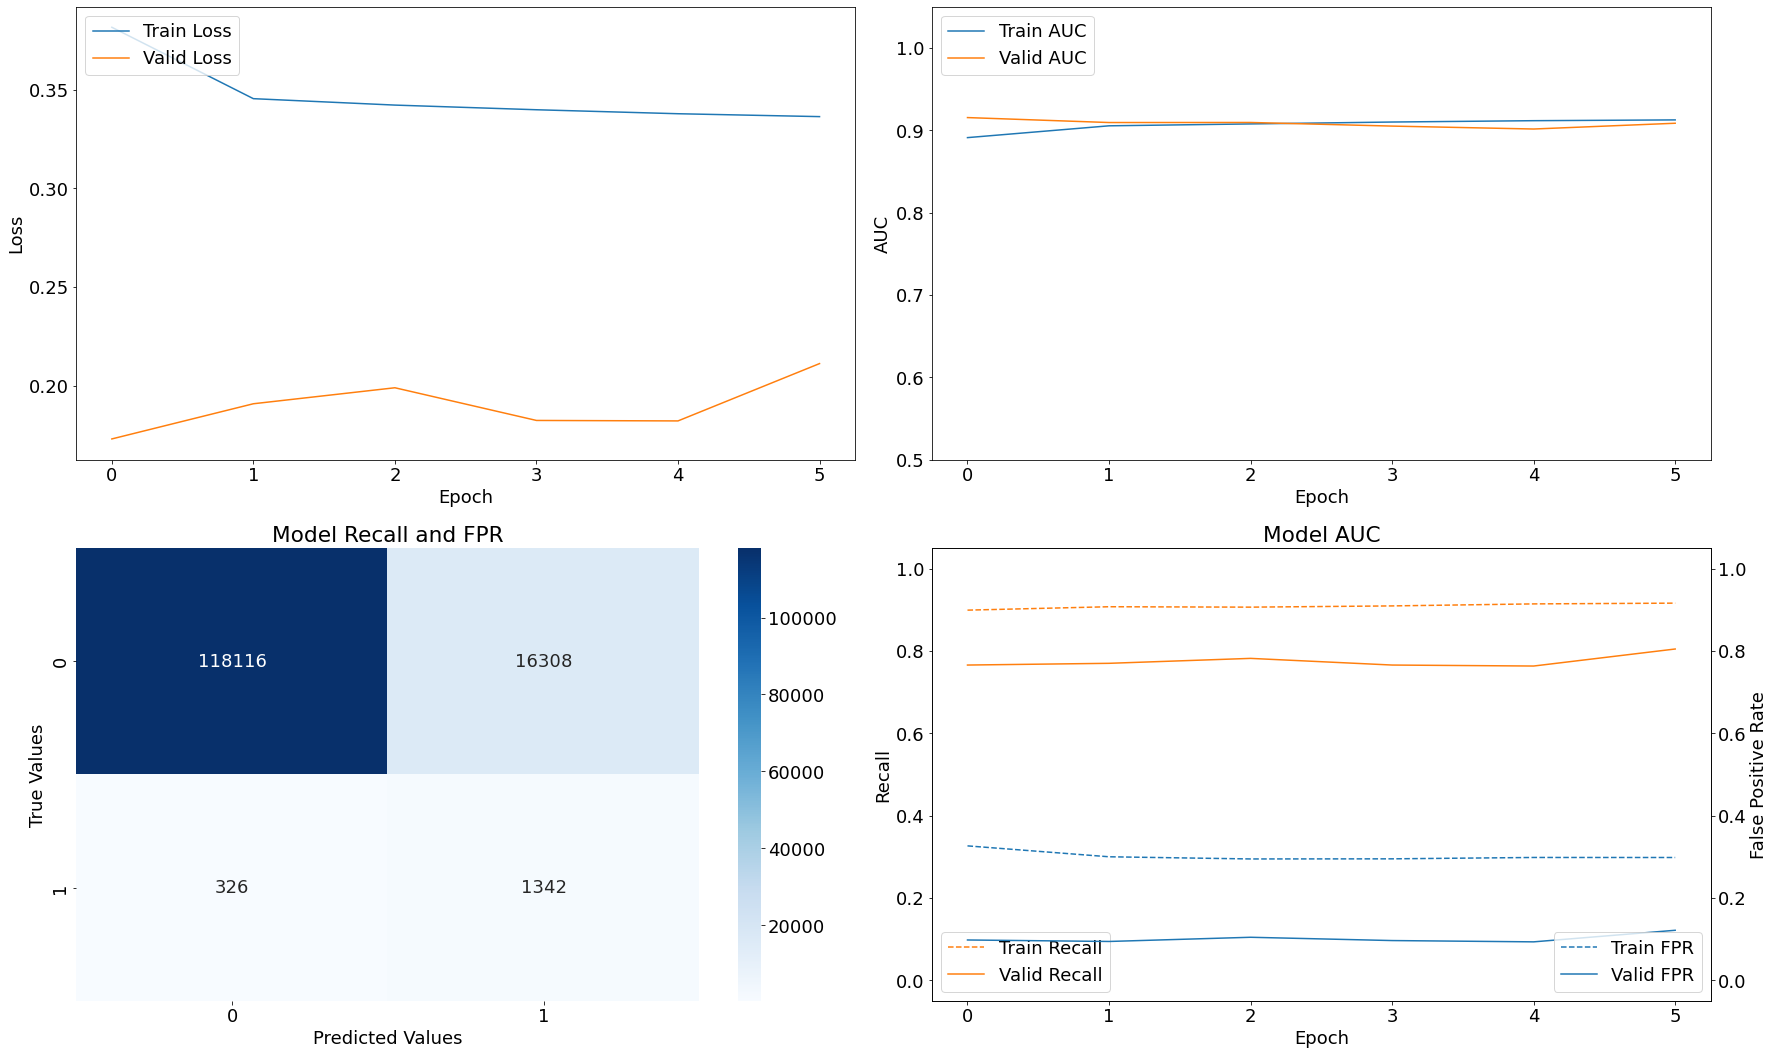

In [25]:
for t in thresholds:
    
    modelling_v9(X_train_v3_scaled_resampled,
                 y_train_v3_resampled,
                 X_val_v3_scaled,
                 y_val_v3,
                 'Variant III Model V9',
                 threshold=t)

---